In [1]:
%matplotlib inline
import pandas as pd

from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import researchpy as rp

import numpy as np

import scipy
from scipy import stats as st

import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.collections import LineCollection

import itertools as ittls
from itertools import product

import random

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from collections import Counter

from itertools import repeat

import cycler

import os

import geopandas as gpd

In [2]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)

In [3]:
#Dataframe de référence géopandas
gdf = gpd.read_file('./geo')[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

# <font color='blue'>MISSION 1: Extraction, analysis and corretion of the data<font>

## <font color='orange'>POPULATION<font>

In [4]:
df_pop1960_2017_worldbank = pd.read_csv('./data/pop1960_2017_workbank.csv')

In [5]:
df_pop1960_2017_worldbank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [6]:
df_pop2017 = df_pop1960_2017_worldbank[['Country Name','Country Code','2017']]

In [7]:
#Population mondiale (en milliards)
pop2017=df_pop2017['2017'].sum()
pop2017/1e+9

79.620441989

#### <font color="red">A lot of duplicates (continental or regional)<font>

In [8]:
df_pop2017['2017'].value_counts().head()

1.788389e+09    2
1.061108e+09    2
6.374616e+06    1
8.809212e+06    1
2.830070e+05    1
Name: 2017, dtype: int64

In [9]:
#Récupération des zones doublons
liste_zone_to_drop=list(df_pop2017.sort_values(by='2017', ascending=False)['Country Code'].iloc[:15])+list(df_pop2017.sort_values(by='2017', ascending=False)['Country Code'].iloc[17:43])

In [10]:
#Suppression des zones doublons
df_pop2017=df_pop2017[~df_pop2017['Country Code'].isin(liste_zone_to_drop)]

#Population mondiale (en milliards)
pop2017=df_pop2017['2017'].sum()
pop2017/1e+9

7.685115412

In [11]:
#liste des pays pris en référence (pour déterminer les données manquantes)
liste_country_reference=list(df_pop2017['Country Code'].unique())
len(liste_country_reference)

223

In [12]:
df_countries_reference = gdf[gdf['ADM0_A3'].isin(liste_country_reference)]

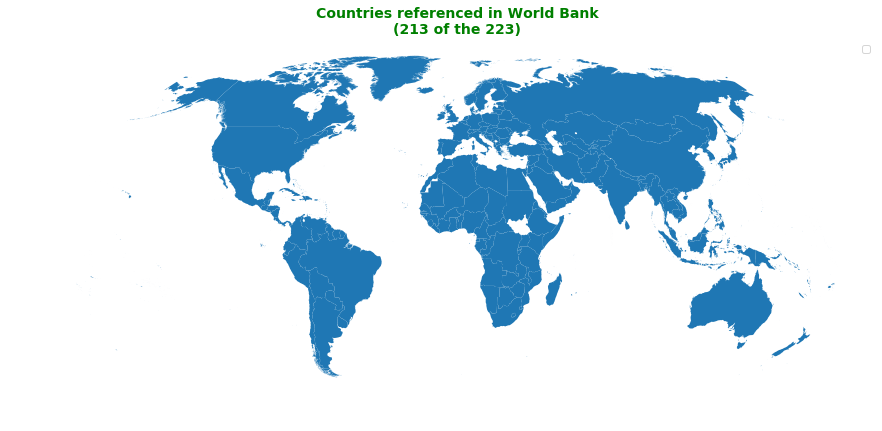

In [13]:
ax = df_countries_reference.plot(figsize=(15,8))
ax.set_axis_off()
ax.legend([liste_country_reference])
plt.title('''Countries referenced in World Bank\n({} of the {})'''.format(len(df_countries_reference.ADM0_A3), len(liste_country_reference)), fontsize=14, fontweight='bold',color='green')
#ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.savefig('./graphiques/213_223_world_mapping.png', dpi=120)
plt.show()

## <font color='orange'>World Income Distribution<font>

In [14]:
df_world_income_distribution = pd.read_csv('./data/world_income_distribution.csv')

In [15]:
df_world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [16]:
#convertions du types de certaines colonnes
df_world_income_distribution['income']=df_world_income_distribution['income'].str.replace(',','.')
df_world_income_distribution['income']=df_world_income_distribution['income'].apply(float)
df_world_income_distribution['gdpppp']=df_world_income_distribution['gdpppp'].str.replace(',','.')
df_world_income_distribution['gdpppp']=df_world_income_distribution['gdpppp'].apply(float)

In [17]:
len(df_world_income_distribution.country.unique())

116

<font color='red'>Many countries did not informed income distribution or gdpppp:  
Did, some countries, specified only one of both features here?<font>

In [18]:
print(df_world_income_distribution.country[df_world_income_distribution['gdpppp'].isin({np.nan})].unique())

['XKX' 'PSE']


In [19]:
print(df_world_income_distribution.country[df_world_income_distribution['income'].isin({np.nan})].unique())

[]


<font color='red'>2 countries did not specify GDPPPP:  
Palestinian Territory (PSE),  
Kosovo(XKX).  
Both are 'minor' for analysis. We can drop them.<font>

In [20]:
df_world_income_distribution=df_world_income_distribution.dropna()

#### <font color='red'>Inconsistent gdpppp values?<font>

In [21]:
df_world_income_distribution.gdpppp.describe()

count    1.139900e+04
mean     5.022128e+04
std      4.000688e+05
min      3.031931e+02
25%      2.576000e+03
50%      7.560000e+03
75%      1.877300e+04
max      4.300332e+06
Name: gdpppp, dtype: float64

#### <font color='red'>MAY BE<font>

In [22]:
#Extract too high gdpppp values
print(df_world_income_distribution.country[df_world_income_distribution['gdpppp']>5e+4].unique())

['FJI' 'LUX']


In [23]:
#Fiji:
#replace by gdpppp value from World Bank
df_world_income_distribution.loc[df_world_income_distribution['country'] == 'FJI', ['gdpppp']] = 4177

In [24]:
df_world_income_distribution[df_world_income_distribution['country']=='FJI'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3200,FJI,2008,1,100,308.17334,4177.0


#### <font color='red'>One row is missing<font>

In [25]:
check = df_world_income_distribution.country.value_counts()

In [26]:
check[check!=100]

LTU    99
Name: country, dtype: int64

#### <font color='red'>One quantile of Lituania is not specified.<font>  
<font color='green'>it will be calculated as the average between quantile n + 1 and n-1. It will be unsignificantly approxiamtive.<font>

In [27]:
n=0
for i,ii in zip(df_world_income_distribution['quantile'][df_world_income_distribution['country']=='LTU'],np.arange(1,101,1)):
    diff=ii-i+n
    if diff<0:
        print('Quantile n°{} is missing'.format(ii))
        n=n+1

Quantile n°41 is missing


In [28]:
q_LTU_40 = int(df_world_income_distribution.income[df_world_income_distribution['country']=='LTU'][df_world_income_distribution['quantile']==40])
q_LTU_42 = int(df_world_income_distribution.income[df_world_income_distribution['country']=='LTU'][df_world_income_distribution['quantile']==42])

In [29]:
q_LTU_41=(q_LTU_40+q_LTU_42)/2

In [30]:
df_world_income_distribution=df_world_income_distribution.append({'country':'LTU','year_survey':2008,'quantile':41,'nb_quantiles':100,'income':q_LTU_41,'gdpppp':17571}, ignore_index=True)

In [31]:
#reorder the Dataframe
df_world_income_distribution=df_world_income_distribution.sort_values(by=['country','quantile'])
df_world_income_distribution.reset_index(drop=True,inplace=True)
liste_country_world_inc_distrib=df_world_income_distribution.country.unique()

#### <font color='green'>What about our countries referenced list? Can we replace missing values?<font>  
Unfortunatly, this kind of data (income distribution) is uncommon. Also, World Bank is the best source we can expect. Still, we could calculate/approximate some data via characteristic countries...not on all missing countries, but we could select some. We will think about it later.

#### <font color='red'>So, how much population do we cover until now?<font>

In [32]:
print('For now, our analysis covers {} countries. It become our new reference list.'.format(len(liste_country_world_inc_distrib)))
liste_country_reference=liste_country_world_inc_distrib

For now, our analysis covers 114 countries. It become our new reference list.


In [33]:
pop=df_pop2017['2017'][df_pop2017['Country Code'].isin(liste_country_reference)].sum()/df_pop2017['2017'].sum()
print('For now, our analysis covers {:.2f}% of the world population.'.format(pop*100))

For now, our analysis covers 88.81% of the world population.


#### <font color='green'>PRETTY COOD!!<font>

### World income distribution mapped

In [34]:
df_world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [35]:
gdf_world_income=gdf.copy()
gdf_world_income['state']=''
for country in gdf_world_income.ADM0_A3.unique():
    if country in liste_country_reference:
        gdf_world_income.loc[gdf_world_income['ADM0_A3'] == country, ['state']] = 'specified'
    else:
        gdf_world_income.loc[gdf_world_income['ADM0_A3'] == country, ['state']] = 'unspecified'

list_abs=[]
for country in liste_country_reference:
    if country not in gdf.ADM0_A3.unique():
        list_abs.append(country)
n_abs=len(list_abs)
print('{} countries from our reference list are not specified in our geopandas data:\n{}'.format(n_abs,list_abs))

0 countries from our reference list are not specified in our geopandas data:
[]


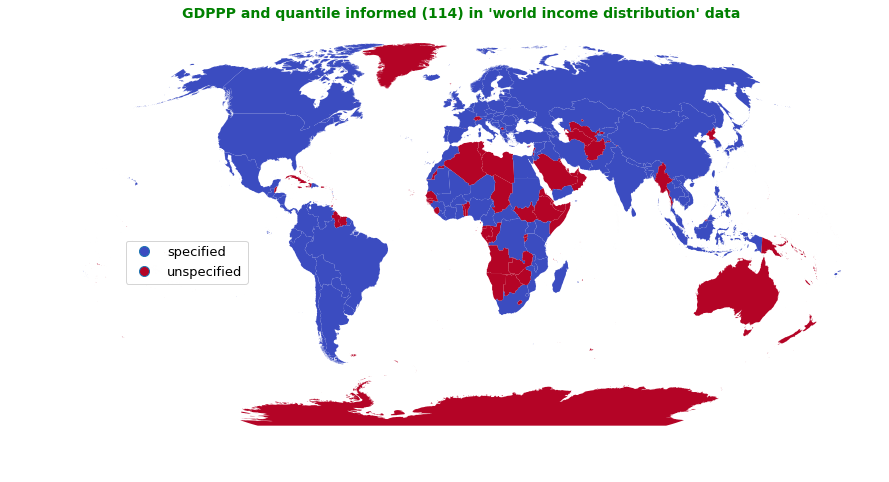

In [36]:
ax = gdf_world_income.plot(column='state', cmap='coolwarm', figsize=(15,8), legend=True,legend_kwds={'fontsize': 13})

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
ax.set_title('''GDPPP and quantile informed ({}) in 'world income distribution' data '''.format(len(liste_country_reference)), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/114_world_inc_distr_mapping.png', dpi=120)
plt.show()

In [37]:
gdf_world_income.head()

,ADM0_A3,geometry,state
0,IDN,(POLYGON ((11108970.26020776 445285.1302330397...,specified
1,MYS,(POLYGON ((11108970.26020776 445285.1302330397...,specified
2,CHL,(POLYGON ((-6477059.899247097 -1872360.8384665...,specified
3,BOL,POLYGON ((-6477059.899247097 -1872360.83846657...,specified
4,PER,(POLYGON ((-6477059.899247097 -1872360.8384665...,specified


In [38]:
map_gdpppp=df_world_income_distribution[['country','gdpppp']].drop_duplicates().copy()

mapp_gdpppp=gdf.merge(map_gdpppp, left_on='ADM0_A3', right_on='country')

mapp_gdpppp=mapp_gdpppp[['ADM0_A3','geometry','gdpppp']]

/usr/local/lib/python3.6/dist-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


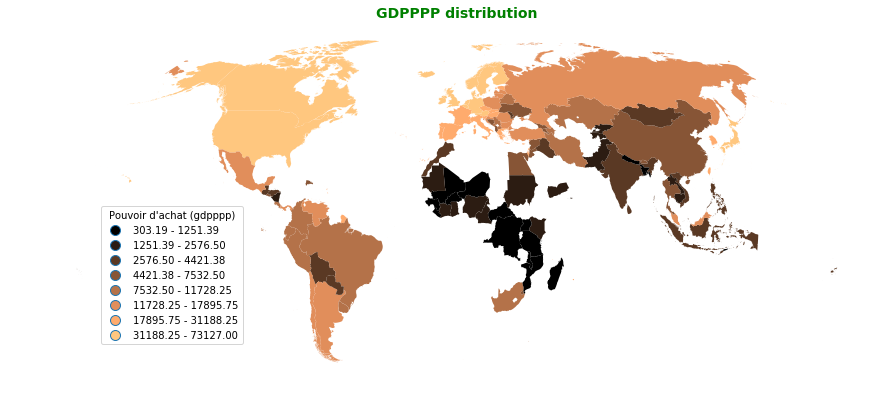

In [39]:
ax = mapp_gdpppp.plot('gdpppp', cmap='copper', figsize=(15,8), scheme='quantiles', k=8, legend=True,legend_kwds={'title': '''Pouvoir d'achat (gdpppp)''', 'fontsize': 10})

ax.set_title('''GDPPPP distribution''', fontsize=14, color='green', fontweight='bold')

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.savefig('./graphiques/gdpppp_mapping.png', dpi=120)

## <font color='orange'>IGEincome (elasticity)<font>

In [40]:
#Parents educational indexes are also extracted for a future analysis ()
df_GDIM_2018 = pd.read_csv('./data/GDIM_2018.csv')#heavy

df_IGE = df_GDIM_2018.copy()
df_IGE = df_IGE[['countryname','iso3','year','cohort','parent','child','IGEincome','MEANp','MEANc']]
df_IGE = df_IGE[df_IGE['IGEincome']>0]#garder les valeurs renseignées

df_IGE = df_IGE[df_IGE['parent']=='avg']
df_IGE = df_IGE[df_IGE['child']=='all']
df_IGE = df_IGE.sort_values(by='iso3')
df_IGE = df_IGE.rename(columns={'MEANp':'years_education_parents'})
df_IGE.head(2)

,countryname,iso3,year,cohort,parent,child,IGEincome,years_education_parents,MEANc
60,Albania,ALB,1970,1970,avg,all,0.815874,8.414939,11.197372
183,Australia,AUS,1960,1960,avg,all,0.275000,10.431962,13.000767


In [41]:
len(df_IGE)

70

In [42]:
liste_pays_IGEincome_known=list(df_IGE.iso3.unique())
len(liste_pays_IGEincome_known)

70

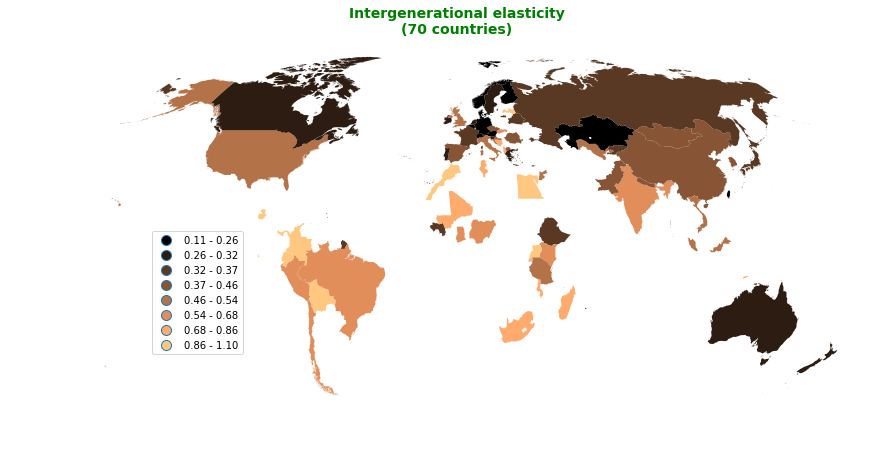

In [43]:
map_IGEincome = gdf.merge(df_IGE, left_on='ADM0_A3', right_on='iso3')
colors = 8
ax = map_IGEincome.plot(column='IGEincome', cmap='copper', figsize=(15,8), scheme='quantiles', k=colors, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.title('''Intergenerational elasticity\n({} countries)'''.format(len(map_IGEincome.iso3.unique())), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/IGEincome_mappping.png', dpi=120)
plt.show()

### <font color='red'>Too many unspecified countries<font>  
#### we need to approximate missing values from countries that have similar characteristics however we will loose too many data

In [44]:
len(liste_country_reference)

114

In [45]:
#extract countries from reference list but missing in IGEincome_known
missing_IGEincome=[x for x in liste_country_reference if x not in liste_pays_IGEincome_known]
#extrapolate IGEincome
len(missing_IGEincome)

51

In [46]:
#Countries that i can't even hope to approximate IGEincome:
liste_pays_IGE=df_GDIM_2018.iso3.unique()

out_of_IGE=[x for x in liste_country_reference if x not in liste_pays_IGE]

out_of_IGE

['SYR']

#### <font color='red'>So, we can't expect approximate Syrian features: we don't even have a comon characteristic to start with.  However other missing countries could be approximated.<font>

In [47]:
try:
    missing_IGEincome.remove('SYR')
except:
    pass
len(missing_IGEincome)

50

In [48]:
df_countries_IGE_approx = df_GDIM_2018[df_GDIM_2018['iso3'].isin(missing_IGEincome)].copy()
df_countries_IGE_approx = df_countries_IGE_approx[['iso3']]
df_countries_IGE_approx = df_countries_IGE_approx.drop_duplicates().reset_index(drop=True)
df_countries_IGE_approx['IGEincome']='abs'
#some countries have an IGEincome but not good parent/child/...

In [49]:
df_countries_IGE_approx.head()

,iso3,IGEincome
0,ARG,abs
1,ARM,abs
2,AZE,abs
3,BFA,abs
4,BGD,abs


In [50]:
list_b=[]
list_c=[]
list_d=[]

for country in df_countries_IGE_approx.iso3:
    try:
        zone=df_GDIM_2018.loc[(df_GDIM_2018["iso3"]== country) & (df_GDIM_2018["cohort"]==1980), "region"].values[0]
        grp2=df_GDIM_2018.loc[(df_GDIM_2018["iso3"]== country) & (df_GDIM_2018["cohort"]==1980), "incgroup2"].values[0]
        grp4=df_GDIM_2018.loc[(df_GDIM_2018["iso3"]== country) & (df_GDIM_2018["cohort"]==1980), "incgroup4"].values[0]
        list_b.append(zone)
        list_c.append(grp2)
        list_d.append(grp4)
    except:
        list_b.append('abs')
        list_c.append('abs')
        list_d.append('abs')

In [51]:
df_countries_IGE_approx['region']=list_b
df_countries_IGE_approx['incgroup2']=list_c
df_countries_IGE_approx['incgroup4']=list_d

In [52]:
df_countries_IGE_approx.head()

,iso3,IGEincome,region,incgroup2,incgroup4
0,ARG,abs,Latin America & Caribbean,Developing economies,Upper middle income
1,ARM,abs,Europe & Central Asia,Developing economies,Lower middle income
2,AZE,abs,Europe & Central Asia,Developing economies,Upper middle income
3,BFA,abs,Sub-Saharan Africa,Developing economies,Low income
4,BGD,abs,South Asia,Developing economies,Lower middle income


In [53]:
#EXCEPTIONS?
df_countries_IGE_approx.loc[(df_countries_IGE_approx["region"]== 'abs') | (df_countries_IGE_approx["incgroup2"]== 'abs') | (df_countries_IGE_approx["incgroup4"]== 'abs'),'iso3']

27    LUX
Name: iso3, dtype: object

#### <font color='red'>Luxembourg ('LUX') is not secified on this features. We can handly correct it.
-region: 'High income'  
-incgroup2: 'High-income economies'  
-incgroup4: 'High income'<font>

In [54]:
#Luxembourg corrections
df_countries_IGE_approx.loc[df_countries_IGE_approx['iso3'] == 'LUX', ['region']] = 'High income'
df_countries_IGE_approx.loc[df_countries_IGE_approx['iso3'] == 'LUX', ['incgroup2']] = 'High-income economies'
df_countries_IGE_approx.loc[df_countries_IGE_approx['iso3'] == 'LUX', ['incgroup4']] = 'High income'

In [55]:
df_IGE.head()

,countryname,iso3,year,cohort,parent,child,IGEincome,years_education_parents,MEANc
60,Albania,ALB,1970,1970,avg,all,0.815874,8.414939,11.197372
183,Australia,AUS,1960,1960,avg,all,0.275000,10.431962,13.000767
243,Austria,AUT,1960,1960,avg,all,0.245267,10.062304,13.047010
351,Belgium,BEL,1960,1960,avg,all,0.183176,8.950124,13.483537
538,Bosnia and Herzegovina,BIH,1970,1970,avg,all,0.827252,8.103372,10.776841


In [56]:
list_approx_IGE=[]
n=0
for country in df_countries_IGE_approx.iso3:
    zone=df_countries_IGE_approx['region'].loc[df_countries_IGE_approx['iso3'].isin({country})]
    grp2=df_countries_IGE_approx['incgroup2'].loc[df_countries_IGE_approx['iso3'].isin({country})]
    grp4=df_countries_IGE_approx['incgroup4'].loc[df_countries_IGE_approx['iso3'].isin({country})]
    try:
        approx_IGE=df_GDIM_2018.IGEincome[(df_GDIM_2018['cohort'].isin([1980,1970,1960])) & (df_GDIM_2018["region"].isin(zone)) & (df_GDIM_2018["incgroup2"].isin(grp2)) & (df_GDIM_2018["incgroup4"].isin(grp4))].mean()
        list_approx_IGE.append(approx_IGE)
    except:
        n=n+1
        print(country,n)

In [57]:
df_countries_IGE_approx['IGEincome']=list_approx_IGE

In [58]:
df_countries_IGE_approx.head()

,iso3,IGEincome,region,incgroup2,incgroup4
0,ARG,0.878852,Latin America & Caribbean,Developing economies,Upper middle income
1,ARM,0.424817,Europe & Central Asia,Developing economies,Lower middle income
2,AZE,0.477171,Europe & Central Asia,Developing economies,Upper middle income
3,BFA,0.661654,Sub-Saharan Africa,Developing economies,Low income
4,BGD,0.523840,South Asia,Developing economies,Lower middle income


In [59]:
df_final_IGE = pd.concat([df_IGE[['iso3','IGEincome']],df_countries_IGE_approx[['iso3','IGEincome']]],ignore_index=True)

In [60]:
df_final_IGE.head()

,iso3,IGEincome
0,ALB,0.815874
1,AUS,0.275000
2,AUT,0.245267
3,BEL,0.183176
4,BIH,0.827252


In [61]:
df_final_IGE=df_final_IGE[df_final_IGE['iso3'].isin(liste_country_reference)]

In [62]:
len(liste_country_reference)

114

In [63]:
len(df_final_IGE.iso3)

113

In [64]:
print([x for x in liste_country_reference if not x in list(df_final_IGE.iso3)])

['SYR']


#### <font color='green'>Still Syria out, update liste_country_reference:<font>

In [65]:
liste_country_reference=list(df_final_IGE.iso3)

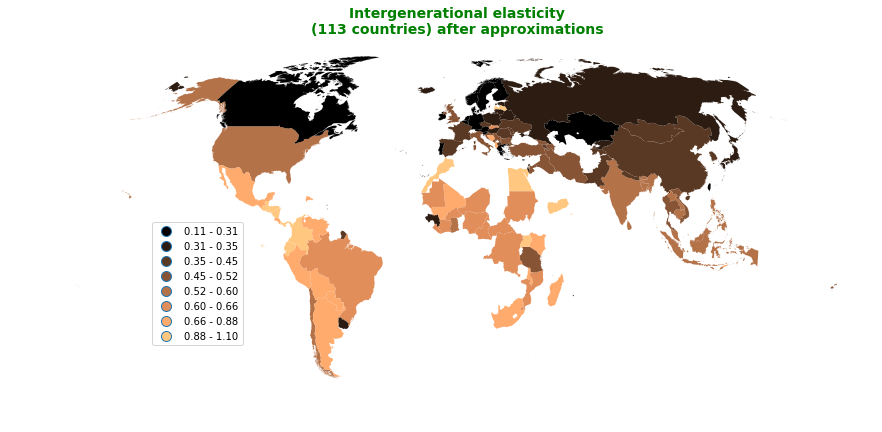

In [66]:
map_IGEincome = gdf.merge(df_final_IGE, left_on='ADM0_A3', right_on='iso3')
colors = 8
ax = map_IGEincome.plot(column='IGEincome', cmap='copper', figsize=(15,8), scheme='quantiles', k=colors, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.title('''Intergenerational elasticity\n({} countries) after approximations'''.format(len(map_IGEincome.iso3.unique())), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/IGEincome_reference_countries_mapping.png', dpi=120)
plt.show()

## <font color='orange'>GINI index<font>

In [67]:
df_world_bank_GINI = pd.read_csv('./data/GINI_wirkd_bank_1969_2017.csv')

In [68]:
len(df_world_bank_GINI)

264

#### <font color='red'>Some countries are not informed, others are informed above several years. We will keep the most recent for each country (informed)<font>

#### <font color='red'>We are able to find some of the unspecified gini indexes (governemental intelligence). We will if needed<font>

In [69]:
df_GINI_recent = df_world_bank_GINI.copy()

In [70]:
liste_year=[]
for i in df_GINI_recent['Country Code'].unique():
    df=df_GINI_recent[df_GINI_recent['Country Code'].isin({i})]
    df=df.dropna(axis='columns')
    columns=df.columns[4:]
    liste_z=[]
    for col in columns:
        colint=int(col)
        liste_z.append((i,colint))
    if len(liste_z)>0:
        liste_year.append(sorted(liste_z,reverse=True)[0])

liste_ii=[]
liste_i=[]
liste_gini=[]

for i,ii in (liste_year):
    liste_i.append(i)
    liste_ii.append(ii)
    gin = float(df_world_bank_GINI['{}'.format(ii)][df_world_bank_GINI['Country Code']==i])
    liste_gini.append(gin)

In [71]:
df_GINI_recent_know=pd.DataFrame({'country':liste_i,'year_GINI':liste_ii,'GINI':liste_gini})

In [72]:
df_GINI_recent_know.head()

,country,year_GINI,GINI
0,AGO,2008,42.7
1,ALB,2012,29.0
2,ARG,2016,42.4
3,ARM,2016,32.5
4,AUS,2010,34.7


In [73]:
df_GINI_recent_know.describe()

,year_GINI,GINI
count,161.000000,161.000000
mean,2012.583851,38.438509
std,4.264034,8.028567
min,1992.000000,16.600000
25%,2011.000000,32.700000
50%,2014.000000,37.400000
75%,2015.000000,43.100000
max,2017.000000,63.000000


#### <font color='red'> NO inconsistent value<font>

In [74]:
liste_pays_GINI_known = list(df_GINI_recent_know.country.unique())

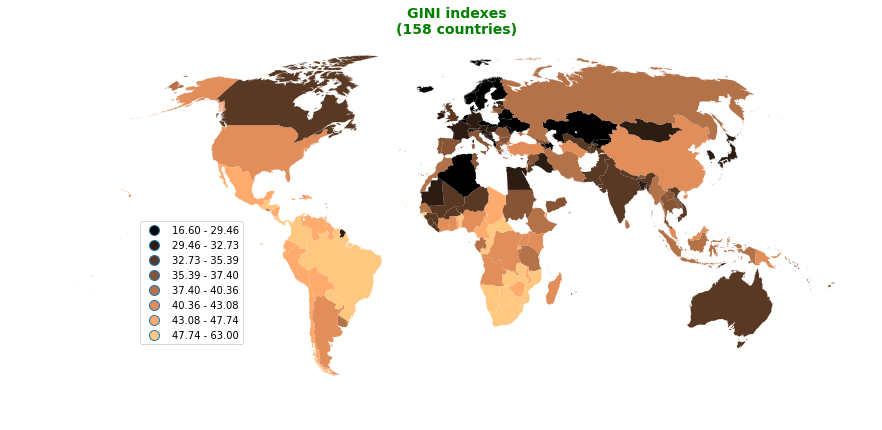

In [75]:
map_GINI = gdf.merge(df_GINI_recent_know, left_on='ADM0_A3', right_on='country')
colors = 8
ax = map_GINI.plot(column='GINI', cmap='copper', figsize=(15,8), scheme='quantiles', k=colors, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.title('GINI indexes\n({} countries)'.format(len(map_GINI.country)), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/GINI_mapping.png', dpi=120)
plt.show()

In [76]:
#difference with number of mapped countries
print(len(df_GINI_recent_know.GINI),len(map_GINI.country))

161 158


In [77]:
miss=[x for x in df_GINI_recent_know.country if x not in list(map_GINI.country)]

In [78]:
df_GINI_recent_know[df_GINI_recent_know['country'].isin(miss)]

,country,year_GINI,GINI
117,PSE,2016,33.7
126,SSD,2009,46.3
156,XKX,2016,26.5


#### <font color='red'>These countries won't be mapped because they are out of the geopandas database: THEN they still can be in our analysis<font>

In [79]:
gdf[gdf['ADM0_A3'].isin(miss)]

,ADM0_A3,geometry


### <font color='red'>Do we have GINI for all our referece country list?<font>

In [80]:
print([x for x in liste_country_reference if not x in list(df_GINI_recent_know.country)])

['TWN', 'KHM', 'PHL', 'POL', 'SRB']


### <font color='green'>Let's correct this handly: form other sources<font>

In [81]:
#Taïwan 2012 CIA data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'TWN', 'year_GINI':2012,'GINI':33.8}, ignore_index=True)
#Poland 2014 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'POL', 'year_GINI':2014,'GINI':32.1}, ignore_index=True)
#Philippines 2015 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'PHL', 'year_GINI':2015,'GINI':40.1}, ignore_index=True)
#Cambodia 2014 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'KHM', 'year_GINI':2014,'GINI':3.8}, ignore_index=True)
#Serbia 2013 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'SRB', 'year_GINI':2013,'GINI':29.1}, ignore_index=True)

In [82]:
print([x for x in liste_country_reference if not x in list(df_GINI_recent_know.country)])

[]


### Are, GINI and IGEincome, countries characteristics separators?

In [83]:
zerba1=df_GDIM_2018[['iso3','region','incgroup4','incgroup2']].drop_duplicates()
zerba2 = zerba1.merge(df_GINI_recent_know, left_on='iso3', right_on='country')

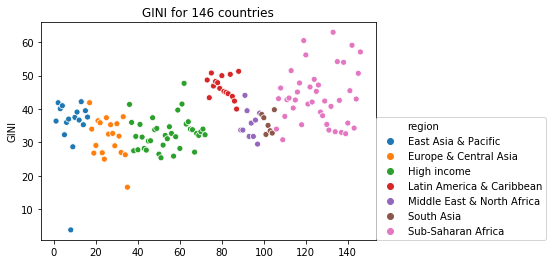

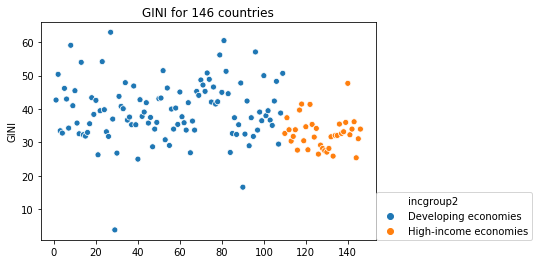

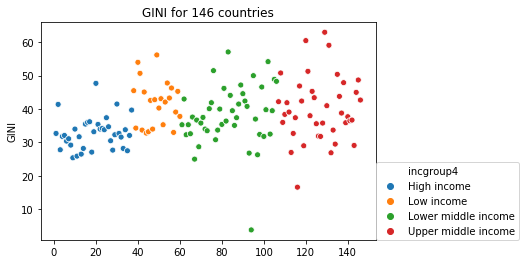

In [84]:
for col in list(['region','incgroup2','incgroup4']):
    data = zerba2.groupby(by=['country','{}'.format(col)],as_index=False).mean().sort_values(by=col)
    sns.scatterplot(x=np.arange(1,len(data)+1,1),y='GINI', hue=col, data=data)
    plt.legend(loc=(1,0))
    plt.title('GINI for {} countries'.format(len(data)))
    plt.savefig('./graphiques/scatter_GINI_mapping.png', dpi=120)
    plt.show()

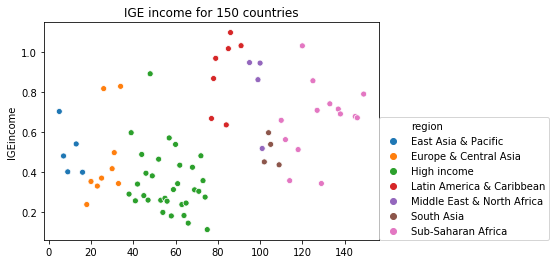

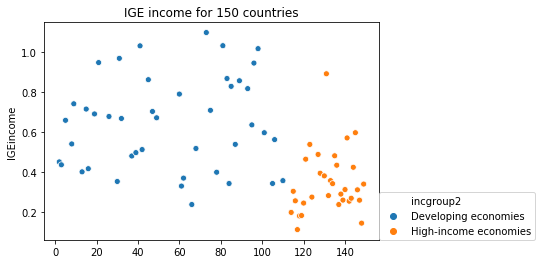

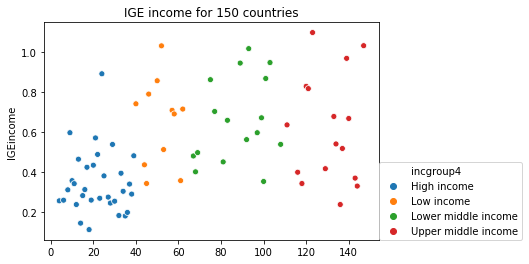

In [85]:
for col in list(['region','incgroup2','incgroup4']):
    data = df_GDIM_2018.groupby(by=['iso3','{}'.format(col)],as_index=False).mean().sort_values(by=col)
    sns.scatterplot(x=np.arange(1,len(data)+1,1),y='IGEincome', hue=col, data=data)
    plt.legend(loc=(1,0))
    plt.title('IGE income for {} countries'.format(len(data)))
    plt.savefig('./graphiques/scatter_IGEincome.png', dpi=120)
    plt.show()

# <font color='orange'>MAPPING DES PAYS DONT NOUS DISPOSONS TOUTES LES DONNEES NECESSAIRES AU PROJET: GINI, INCOMES et IGEincome.<font>

In [86]:
df_final = df_final_IGE.merge(df_GINI_recent_know, left_on='iso3', right_on='country',)

In [87]:
df_final=df_final.drop(columns='iso3')
df_final=df_final[['country','IGEincome','year_GINI','GINI']]
df_final.head()

,country,IGEincome,year_GINI,GINI
0,ALB,0.815874,2012,29.0
1,AUT,0.245267,2015,30.5
2,BEL,0.183176,2015,27.7
3,BIH,0.827252,2015,32.7
4,BLR,0.342738,2016,27.0


In [88]:
liste_country_reference=list(df_final.country.unique())
print(len(liste_country_reference))

113


In [89]:
pop_data=df_pop2017['2017'][df_pop2017['Country Code'].isin(liste_country_reference)].sum()

In [90]:
map_pop2017=gdf.copy()

liste_etat=[]

for iso in list(map_pop2017.ADM0_A3.unique()):
    if iso in liste_country_reference:
        liste_etat.append('renseigné')
    else:
        liste_etat.append('non-renseigné')

map_pop2017['état']=liste_etat

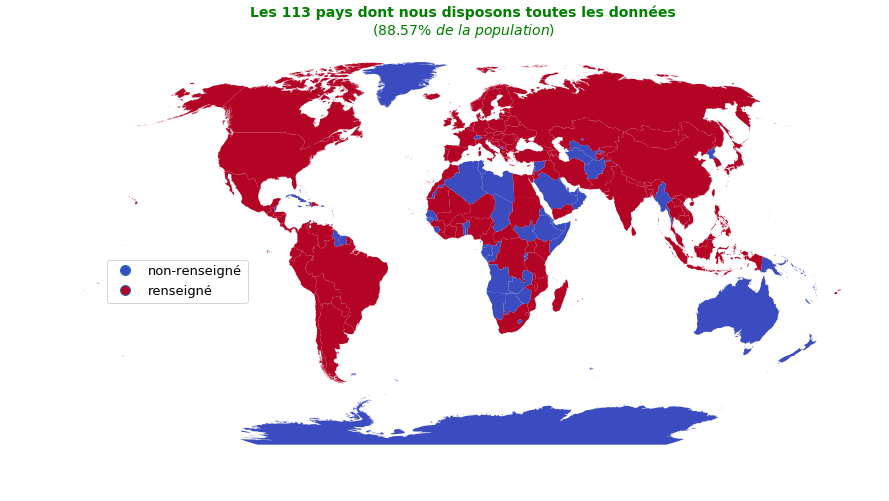

In [91]:
ax = map_pop2017.plot(column='état', cmap='coolwarm', figsize=(15,8), legend=True,legend_kwds={'fontsize': 13})

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
ax.set_title('''Les {} pays dont nous disposons toutes les données\n$({:.2f}\%\ de\ la\ population)$'''.format(len(liste_country_reference),pop_data/pop2017*100), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/reference_countries_mapping.png', dpi=120)
plt.show()

### <font color='red'>SOME COUNTRIES ARE STILL MISSING<font>  
#### Because they did not specified IGEincome, however we can't approximate it, too risky: too many countries, different sources and take a long time.
### <font color='green'>By the way our analysis is based on 113 countries and >88% of the world population<font>

# <font color='blue'>MISSION 2<font>

## <font color='orange'>Income diversity in the world<font>

#### Pays choisis: chaque pays dont le $ppp est représentatif de chaque décile de revenu

In [92]:
#Récupérer la liste des pays renseignés dans chaque DataFrame (GINI et income)
liste_country_in_world_bank_GINI = df_world_bank_GINI['Country Code'].unique()
liste_country_in_world_income_distribution = df_world_income_distribution['country'].unique()

In [93]:
intersection_country_list= [value for value in liste_country_in_world_income_distribution if value in liste_country_in_world_bank_GINI]

In [94]:
df_country_10 = df_world_income_distribution.copy()
df_country_10 = df_country_10[['country','income']]

In [95]:
#Récupérer les valeurs des déciles relatifs aux gdpppp des pays
df_country_10c = df_world_income_distribution.copy()
df_country_10c = df_country_10c[['country','gdpppp']]
df_country_10c = df_country_10c.drop_duplicates()
df_country_10c = df_country_10c.dropna()
df_country_10c = df_country_10c[df_country_10c['country'].isin(intersection_country_list)]

In [96]:
decile_10c = np.percentile(df_country_10c['gdpppp'],np.arange(0,100,10))

In [97]:
decile_10c

array([   303.19305  ,   1091.03756  ,   2021.4      ,   3267.6      ,
         4523.5864408,   7505.       ,  10486.4      ,  13407.6      ,
        22716.2      ,  33731.6      ])

In [98]:
for ndec , dec in zip(np.arange(1,11,1),decile_10c):
    df_country_10c['decile_{}={}'.format(ndec,dec)] = abs(df_country_10c['gdpppp']-dec)

In [99]:
#Récupérer les pays représentatif de chaque décile
country_list=[]
country_code_list=[]
columns = df_country_10c.columns[3:]
for column in columns:
    diffmin = df_country_10c['{}'.format(column)].min()
    country = df_country_10c['country'][df_country_10c['{}'.format(column)]==diffmin]
    country_list.extend(country)
for state in country_list:
    state_code = df_country_10c.country[df_country_10c['country'].isin({'{}'.format(state)})]
    country_code_list.extend(state_code)
country_code_list

['BFA', 'CMR', 'MNG', 'BTN', 'DOM', 'KAZ', 'CHL', 'CZE', 'DEU']

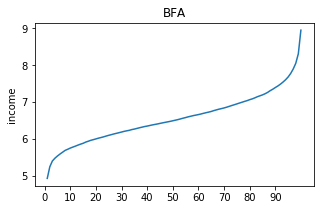

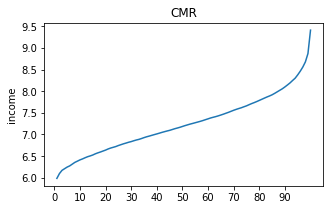

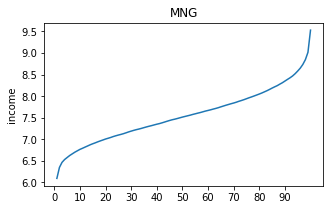

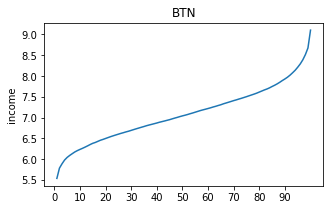

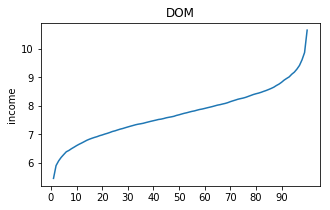

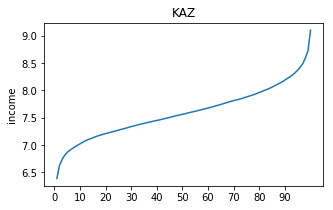

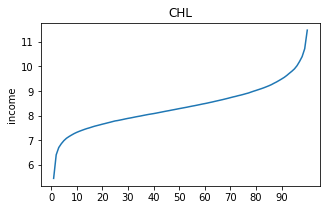

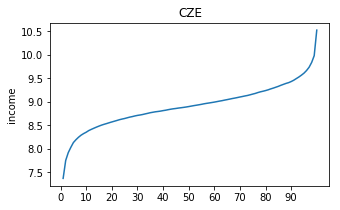

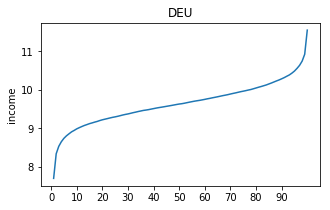

In [100]:
for code_country, name_country in zip(country_code_list,country_list):
    df = df_country_10[df_country_10['country'].isin({'{}'.format(code_country)})]
    plt.figure(figsize=(5,3))
    sns.lineplot(x=np.arange(1,101,1),y=np.log(df.income))
    plt.title('{}'.format(name_country))
    plt.xticks(np.arange(0,91,10))

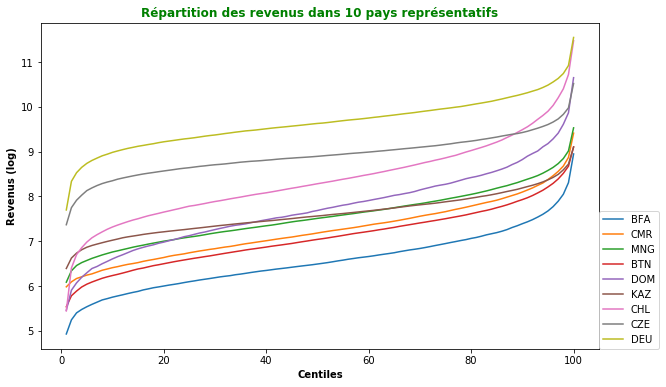

In [101]:
plt.figure(figsize=(10,6))
for country in country_list:
    x = np.arange(1, 101,1)
    y = np.log(df_country_10.income[df_country_10['country']==country])
    plt.plot(x,y)
    plt.legend(country_list, loc=(1,0))
plt.title('Répartition des revenus dans 10 pays représentatifs',color='g', fontsize=12, fontweight='bold')
plt.xlabel('Centiles', fontweight='bold')
plt.ylabel('Revenus (log)', fontweight='bold')
plt.savefig('./graphiques/log_gdppp_1O_countries.png', dpi=120)
plt.show()

## <font color='orange'>Lorenz curve (of the 10th countries)<font>

In [102]:
def lorenz_curve_gini(column,x_title, title_name, file_name, to_save):
#LORENZ curve
    x = column.values
    lorenz = np.cumsum(np.sort(x)) / x.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle='steps-post')
    plt.title('Courbe de Lorenz: {}en 2008'.format(title_name), fontsize=12, fontweight='bold')
    plt.xlabel('{}'.format(x_title), fontsize=10, fontweight='bold')
    plt.ylabel('% de la somme totale des valeurs', fontsize=10, fontweight='bold')
    if to_save is not None:
        plt.savefig('./Graphiques/{}.png'.format(file_name), dpi=150)
#COEFF de GINI
    aire_sous_courbe = lorenz[:-1].sum()/len(lorenz)
    S = 0.5 - aire_sous_courbe #0.5 est l'aire sous la bissectrice
    gini = 2*S
    plt.show(), print('Le coefficient de gini est de: {}.'.format(abs(gini)))

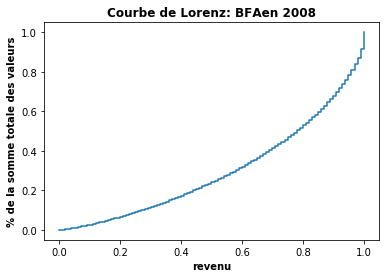

Le coefficient de gini est de: 0.41346878201853854.


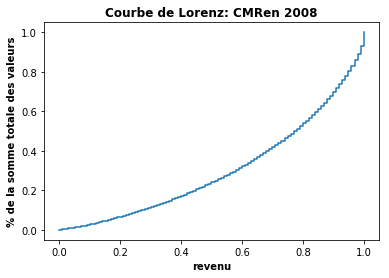

Le coefficient de gini est de: 0.4053094905846134.


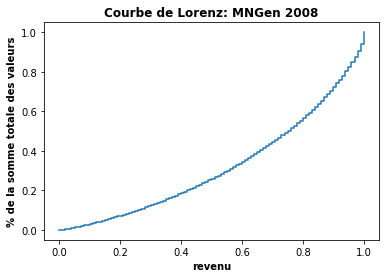

Le coefficient de gini est de: 0.3743074557592819.


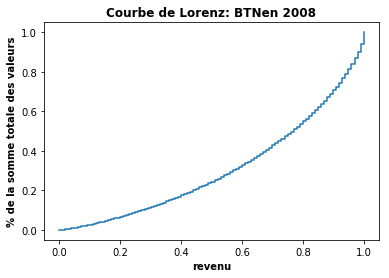

Le coefficient de gini est de: 0.396847074350242.


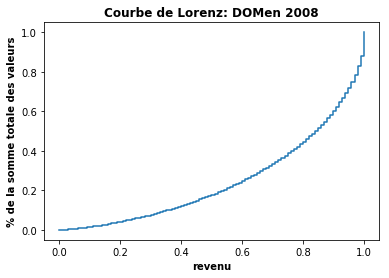

Le coefficient de gini est de: 0.5173504798209367.


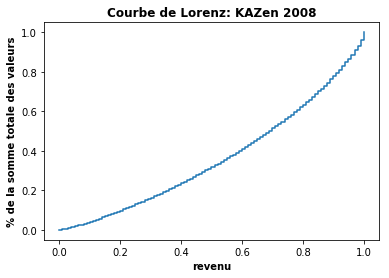

Le coefficient de gini est de: 0.2844987367955639.


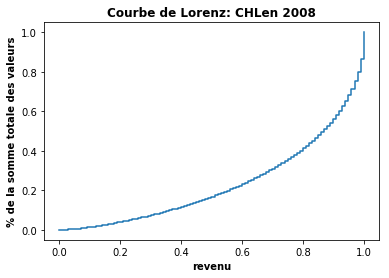

Le coefficient de gini est de: 0.5461147218700535.


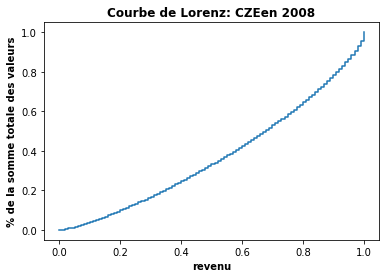

Le coefficient de gini est de: 0.2701622826475536.


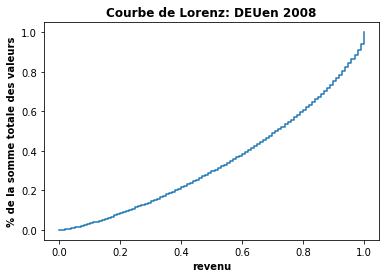

Le coefficient de gini est de: 0.32323295943419517.


In [103]:
for country in country_list:
    data0 = df_country_10[df_country_10['country']==country]
    lorenz_curve_gini(data0.income, 'revenu','{}'.format(country),None,None)
plt.show()

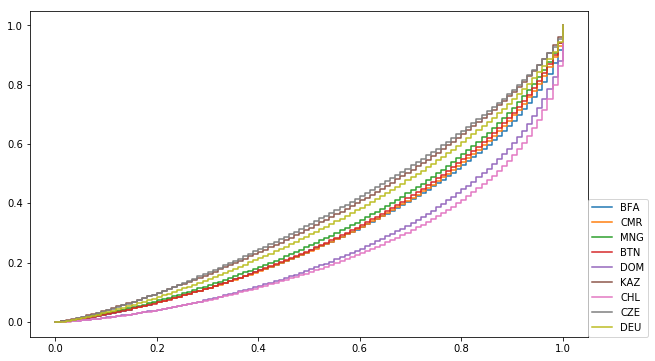

In [104]:
plt.figure(figsize=(10,6))
for country in country_list:
    x = df_country_10.income[df_country_10['country']==country].values
    lorenz = np.cumsum(np.sort(x)) / x.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle='steps-post')
    plt.legend(country_list, loc=(1,0))

plt.show()

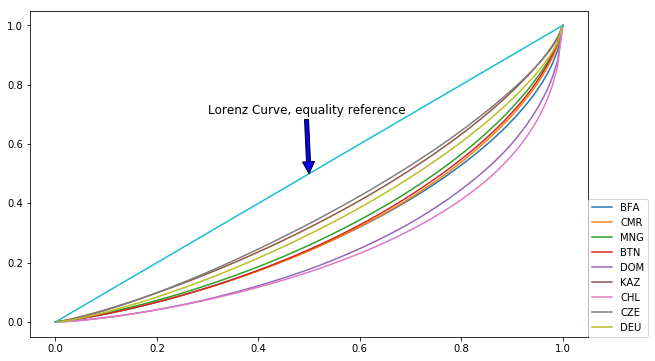

In [105]:
def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

plt.figure(figsize=(10,6))
for country in country_list:
    x = df_country_10.income[df_country_10['country']==country].values
    lorenz_curve = lorenz(x)
    plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
    plt.legend(country_list, loc=(1,0))
plt.plot([0,1], [0,1])
plt.annotate('Lorenz Curve, equality reference', xy=(0.5, 0.5), xytext=(0.3, 0.7),size=12,
            arrowprops=dict(facecolor='blue', shrink=0)
            )
plt.savefig('./graphiques/lorenz_curve_1O__countries.png', dpi=120)
plt.show()

## <font color='orange'>GINI evolution (some issues due to unspecified data)<font>

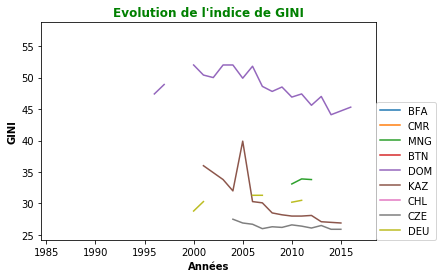

In [106]:
list_years = list(np.arange(1960,2018,1))
for country in country_list:
    list_gini = []
    for year in list_years:
        gini = df_world_bank_GINI['{}'.format(year)][df_world_bank_GINI['Country Code'].isin({country})].values
        list_gini.extend(gini)
    x=list_years
    y=list_gini
    plt.plot(x,y)
plt.legend(country_list, loc=(1,0))
plt.title('''Evolution de l'indice de GINI''',color='g', fontsize=12, fontweight='bold')
plt.xlabel('Années', fontweight='bold')
plt.ylabel('GINI', fontweight='bold')
plt.savefig('./graphiques/timelapse_GINI.png', dpi=120)
plt.show()

list_years = list(np.arange(1960,2018,1))
for country in country_list:
    list_gini = []
    for year in list_years:
        gini = df_world_bank_GINI['{}'.format(year)][df_world_bank_GINI['Country Name'].isin({country})].values
        list_gini.extend(gini)
    x=list_years
    y=list_gini
    plt.plot(x,y)
    plt.title('''Evolution de l'indice de GINI de:\n{}'''.format(country),color='g', fontsize=12, fontweight='bold')
    plt.xlabel('Années', fontweight='bold')
    plt.ylabel('GINI', fontweight='bold')
    plt.show()

## <font color='orange'>GINI ranking<font>

In [107]:
x_fr=df_GINI_recent_know.sort_values(by='GINI',ascending=False).reset_index(drop=True)[df_GINI_recent_know.sort_values(by='GINI',ascending=False).reset_index(drop=True)['country']=='FRA'].index[0]
y_fr=df_GINI_recent_know.GINI[df_GINI_recent_know['country']=='FRA']

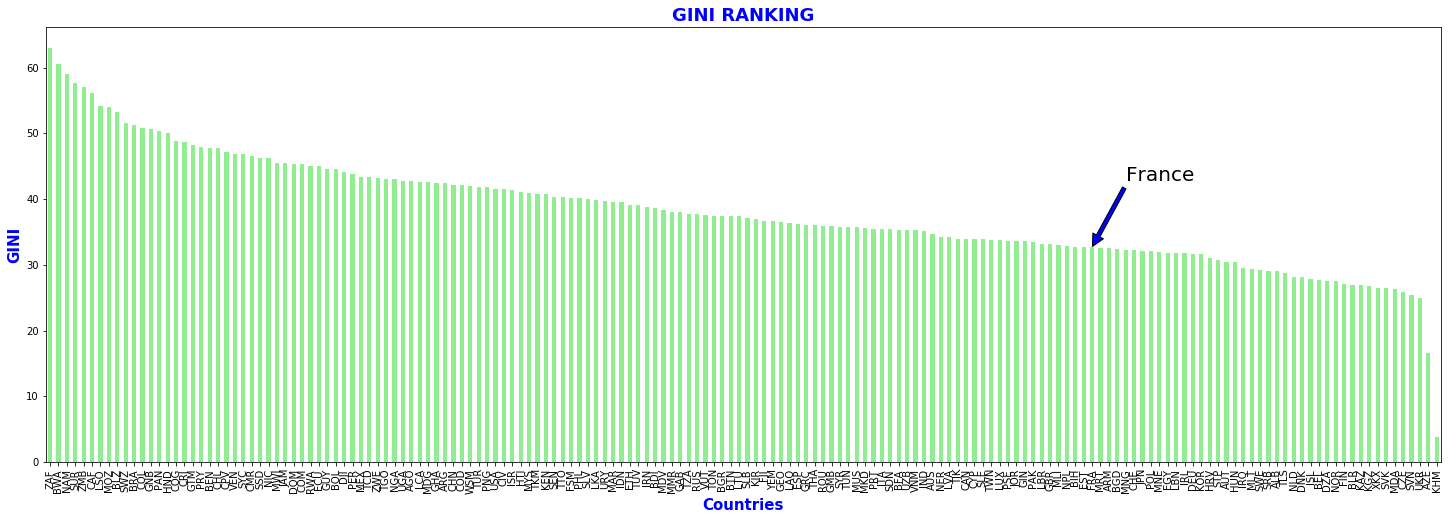

<Figure size 432x288 with 0 Axes>

In [108]:
df_GINI_recent_know.sort_values(by='GINI',ascending=False).plot(
    kind='bar',x='country',y='GINI', legend=False,figsize=(25,8), color='lightgreen')

plt.title('GINI RANKING', fontsize=18, fontweight='bold', color='b')
plt.xlabel('Countries', fontsize=15, fontweight='bold',color='b')
plt.ylabel('GINI', fontsize=15, fontweight='bold',color='b')
plt.annotate('France', xy=(x_fr, y_fr), xytext=(x_fr+4, y_fr+10),size=20,
            arrowprops=dict(facecolor='blue', shrink=0.01)
            )
plt.show()
plt.savefig('./graphiques/classement_GINI_countries.png', dpi=120)

# <font color='blue'>MISSION 3<font>

#### <font color= 'organge'>Creating baseline dataframe<font>

In [109]:
df_baseline = df_final[['country','IGEincome','GINI']].merge(df_world_income_distribution[['country','gdpppp']], on='country')
df_baseline = df_baseline.drop_duplicates().reset_index(drop=True)
df_baseline.head()

,country,IGEincome,GINI,gdpppp
0,ALB,0.815874,29.0,7297.0
1,AUT,0.245267,30.5,36193.0
2,BEL,0.183176,27.7,33561.0
3,BIH,0.827252,32.7,7472.0
4,BLR,0.342738,27.0,11651.0


### <font color='orange'>Instructions 1 & 2 generate Ln(Yparents) and errors<font>

In [110]:
n=100 # centiles
n_indiv = n*1000 # nombre d'individus
#On aura donc 1K individus pour chaque centile et 100k individus parents par pays
#On génère les indivdus parents
list_erreurE = st.norm(0,1).rvs(size=n_indiv) #erreurs générées selon une loi normale (0,1)
list_LnYparent = st.norm(10,1).rvs(size=n_indiv) #Ln du revenu des parents générés selon une loi normale (10,1)

In [111]:
df_instruction=df_baseline[['country','IGEincome']].iloc[np.repeat(np.arange(len(df_baseline)), 1000*n)]
df_instruction=df_instruction.reset_index(drop=True)
df_instruction.head()

,country,IGEincome
0,ALB,0.815874
1,ALB,0.815874
2,ALB,0.815874
3,ALB,0.815874
4,ALB,0.815874


In [112]:
print('So, there is {} individual per country'.format(len(df_instruction)/len(df_instruction.country.unique())))

So, there is 100000.0 individual per country


In [113]:
#repeat lists to match with the DataFrame
list_erreurE_matched = np.tile(list_erreurE,len(df_instruction.country.unique()))
list_LnYparent_matched = np.tile(list_LnYparent,len(df_instruction.country.unique()))

df_instruction['Ln_parents_income'] = list_LnYparent_matched 
df_instruction['error']= list_erreurE_matched

In [114]:
df_instruction.head()

,country,IGEincome,Ln_parents_income,error
0,ALB,0.815874,8.839652,0.527042
1,ALB,0.815874,11.366973,0.206864
2,ALB,0.815874,9.466496,0.586526
3,ALB,0.815874,9.087110,1.174178
4,ALB,0.815874,10.910979,1.765664


### <font color='orange'>Instructions 3 child and parents incomes<font>

In [115]:
df_instruction1 = df_instruction.copy()

In [116]:
#child income
df_instruction1['incomes_child'] = np.exp(df_instruction1.IGEincome*df_instruction1.Ln_parents_income+df_instruction1.error)

In [117]:
#parents income
df_instruction1['incomes_parents'] = np.exp(df_instruction1.Ln_parents_income)

In [118]:
df_instruction1.head()

,country,IGEincome,Ln_parents_income,error,incomes_child,incomes_parents
0,ALB,0.815874,8.839652,0.527042,2296.379784,6902.593120
1,ALB,0.815874,11.366973,0.206864,13106.821077,86419.906243
2,ALB,0.815874,9.466496,0.586526,4064.309299,12919.540962
3,ALB,0.815874,9.087110,1.174178,5367.507647,8840.600455
4,ALB,0.815874,10.910979,1.765664,42944.050119,54774.465997


### <font color='orange'>Instructions 4 calculate child and parents classes distrtibution in each country<font>

In [119]:
dictio_deciles_child={}
dictio_deciles_parents={}
for country in df_instruction1.country.unique():
    #Détermination des limites des centiles enfant et centiles parents
    liste_deciles_incomes_child = []
    liste_deciles_incomes_parent = []
    df=df_instruction1[df_instruction1['country']==country]
    for i in np.arange(0.01,1.01,0.01): #centiles dans la méthode pour la méthode .quantile()
        exec('deci_child = df.incomes_child.quantile({})'.format(i))
        liste_deciles_incomes_child.append(deci_child)
        exec('deci_parents = df.incomes_parents.quantile({})'.format(i))
        liste_deciles_incomes_parent.append(deci_parents)
    dictio_deciles_parents[country]=liste_deciles_incomes_parent
    dictio_deciles_child[country]=liste_deciles_incomes_child

In [120]:
#Détermination des décile enfant de chaque individus et récupération dans une liste
liste_deci_child=[]
list_inc_child=list(df_instruction1.incomes_child)
list_df_instruction1_country = list(df_instruction1.country)

for country, inc_child in zip (list_df_instruction1_country,list_inc_child):
    list_decile_limits=dictio_deciles_child[country]
    for deci,incomes_deci in zip (np.arange(1,101,1),list_decile_limits):
        if inc_child < incomes_deci:
            liste_deci_child.append(deci)
            break
        elif inc_child >= list_decile_limits[99]:
            liste_deci_child.append(100)
            break

In [121]:
#Détermination des décile parents de chaque individus et récupération dans une liste
liste_deci_parents=[]
list_inc_parents=list(df_instruction1.incomes_parents)

for country, inc_parents in zip (list_df_instruction1_country,list_inc_parents):
    list_decile_limits=dictio_deciles_parents[country]
    for deci,incomes_deci in zip (np.arange(1,101,1),list_decile_limits):
        if inc_parents < incomes_deci:
            liste_deci_parents.append(deci)
            break
        elif inc_parents >= list_decile_limits[99]:
            liste_deci_parents.append(100)
            break

In [122]:
df_instruction1['deci_child']=liste_deci_child
df_instruction1['deci_parents']=liste_deci_parents

In [123]:
df_instruction1.head()

,country,IGEincome,Ln_parents_income,error,incomes_child,incomes_parents,deci_child,deci_parents
0,ALB,0.815874,8.839652,0.527042,2296.379784,6902.593120,38,13
1,ALB,0.815874,11.366973,0.206864,13106.821077,86419.906243,85,92
2,ALB,0.815874,9.466496,0.586526,4064.309299,12919.540962,55,30
3,ALB,0.815874,9.087110,1.174178,5367.507647,8840.600455,64,19
4,ALB,0.815874,10.910979,1.765664,42944.050119,54774.465997,98,83


### <font color='orange'>Instructions 5 parents & child classes probabilities<font>

In [124]:
df_instructions1_count=df_instruction1[['country','deci_parents','deci_child']].copy()
df_instructions1_count['n_count']=1

#Faire attention à l'ordre de groupby (qu'il corresponde à la dataframe finale)
df_instructions1_count=df_instructions1_count.groupby(['country','deci_parents','deci_child'],sort=True).count().unstack(fill_value=0).stack()

In [125]:
df_instructions1_count['proba_percent']=df_instructions1_count.n_count/10
df_instructions1_count=df_instructions1_count.reset_index()
df_instructions1_count.head()

,country,deci_parents,deci_child,n_count,proba_percent
0,ALB,1,1,225,22.5
1,ALB,1,2,111,11.1
2,ALB,1,3,72,7.2
3,ALB,1,4,63,6.3
4,ALB,1,5,43,4.3


### <font color='orange'>Instructions 6 graphs (max and min IGEincome)<font>

In [126]:
#extract reference IGEincome countries
max_IGEincome = df_final.country.loc[df_final['IGEincome'].idxmax()]
min_IGEincome = df_final.country.loc[df_final['IGEincome'].idxmin()]
print('''Country having highest IGEincome: {}\nCountry having lowest IGEincome: {}\n'''.format(max_IGEincome,min_IGEincome))

Country having highest IGEincome: COL
Country having lowest IGEincome: FIN



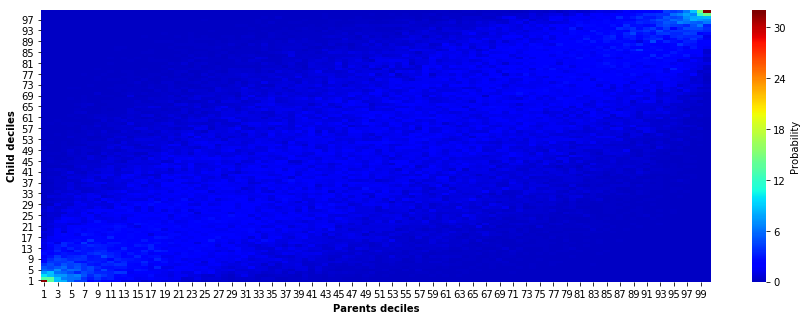

In [127]:
df_proba_COL=df_instructions1_count[df_instructions1_count['country']=='COL']

df=df_proba_COL.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)

plt.figure(figsize = (15,5))
ax=sns.heatmap(data=df,cbar=True,center=15,cmap='jet',cbar_kws={'label': 'Probability'})
ax.invert_yaxis()
ax.set_xlabel('Parents deciles', fontweight='bold')
ax.set_ylabel('Child deciles',fontweight='bold')
plt.show()

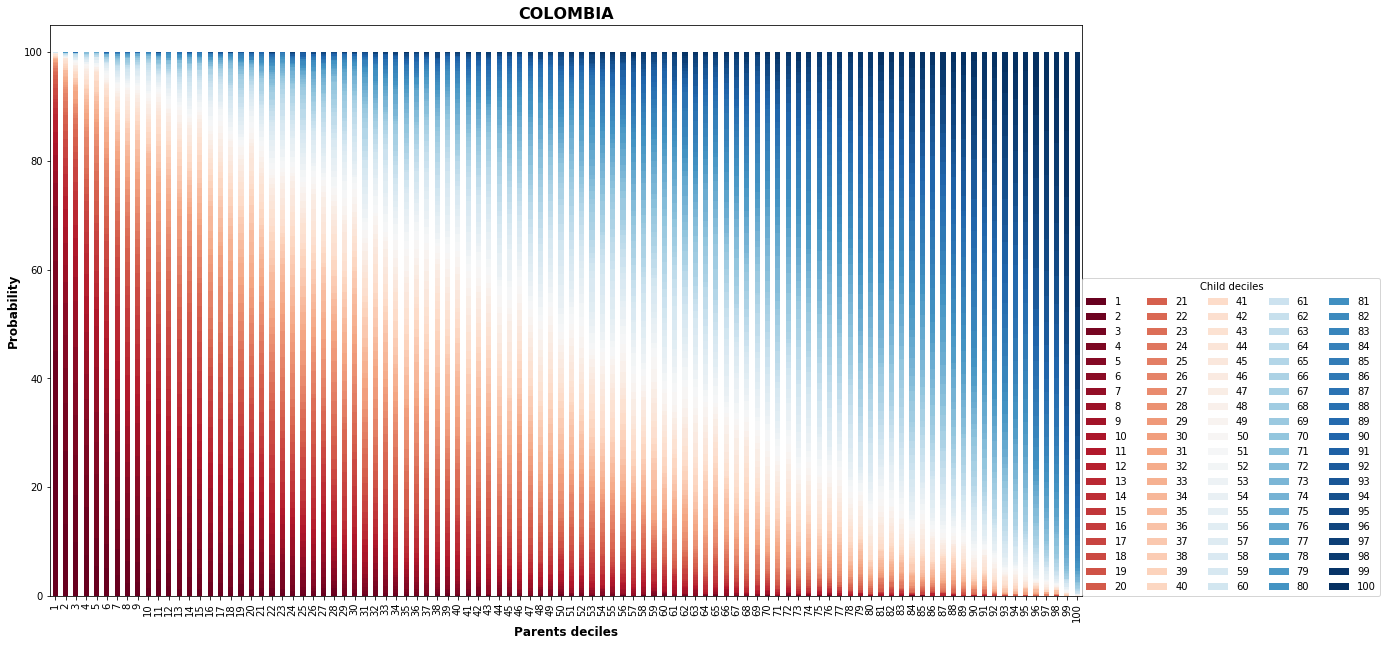

In [128]:
df=df_proba_COL.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5),colormap='RdBu')
ax.set_xlabel('Parents deciles',fontsize=12, fontweight='bold')
ax.set_ylabel('Probability',fontsize=12,fontweight='bold')
plt.title('COLOMBIA',fontsize=16,fontweight='bold')
plt.legend(loc=(1,0), bbox_to_anchor=(1,0), ncol=5, title='Child deciles')
plt.savefig('./graphiques/deciles_repartition_colombia.png', dpi=120)
plt.show()

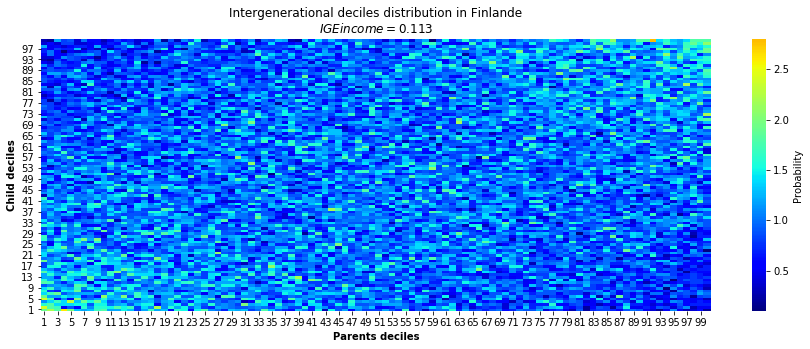

In [129]:
df_proba_FIN=df_instructions1_count[df_instructions1_count['country']=='FIN']

df=df_proba_FIN.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)

plt.figure(figsize = (15,5))
ax=sns.heatmap(data=df,cbar=True,center=2,cmap='jet',cbar_kws={'label': 'Probability'})
ax.invert_yaxis()
ax.set_xlabel('Parents deciles', fontweight='bold')
ax.set_ylabel('Child deciles',fontweight='bold')
ax.set_title(label='Intergenerational deciles distribution in Finlande\n$IGEincome={:.3f}$'.format(float(df_final.IGEincome[df_final['country']=='FIN'].values)))
plt.show()

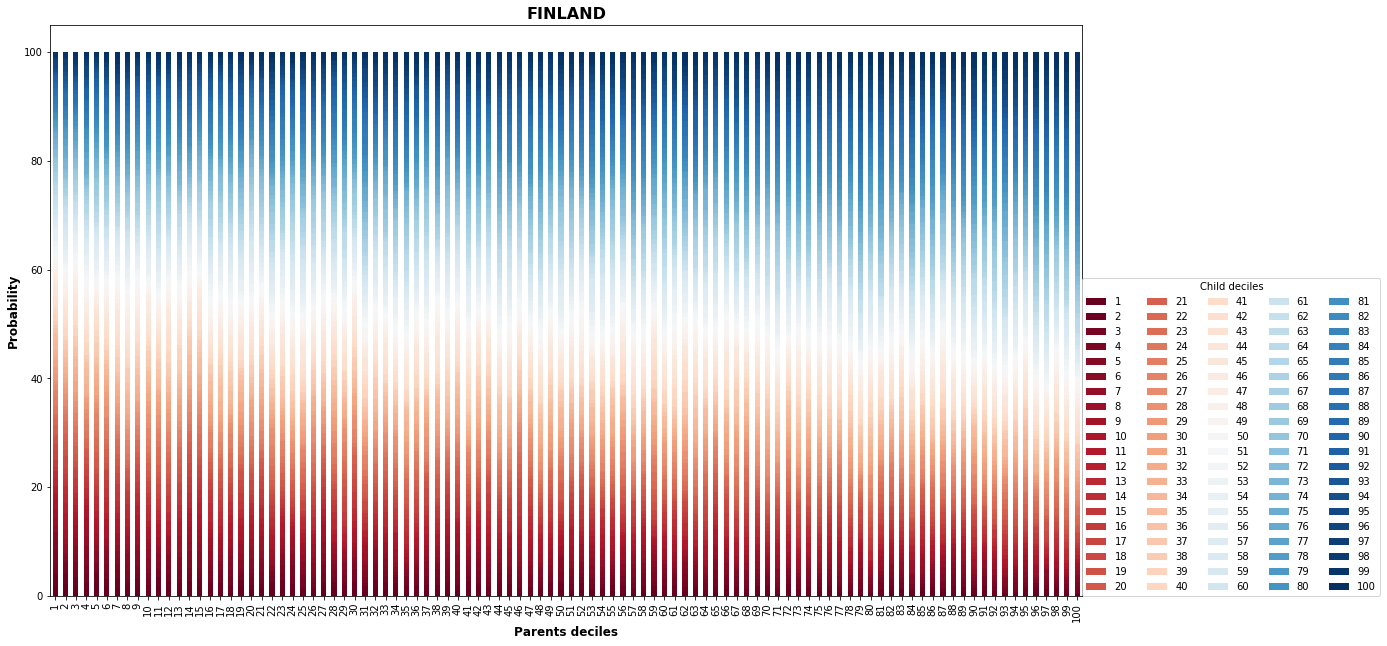

In [130]:
df=df_proba_FIN.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5),colormap='RdBu')
ax.set_xlabel('Parents deciles', fontsize=12, fontweight='bold')
ax.set_ylabel('Probability', fontsize=12,fontweight='bold')
plt.title('FINLAND',fontsize=16,fontweight='bold')
plt.legend(loc=(1,0), bbox_to_anchor=(1,0), ncol=5, title='Child deciles')
plt.savefig('./graphiques/deciles_repartition_finland.png', dpi=120)
plt.show()

### <font color='orange'>Instructions 8 to 11 new sample<font>

In [131]:
df_world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [132]:
df_new_sample = df_world_income_distribution[['country','quantile','income']][df_world_income_distribution['country'].isin(liste_country_reference)].copy()
df_new_sample = df_new_sample.rename(columns={'quantile':'c_parents'})
df_new_sample=df_new_sample.iloc[np.repeat(np.arange(len(df_new_sample)), 500)]

In [133]:
len(df_new_sample)

5650000

In [134]:
df_new_sample.head()

,country,c_parents,income
0,ALB,1,728.89795
0,ALB,1,728.89795
0,ALB,1,728.89795
0,ALB,1,728.89795
0,ALB,1,728.89795


### <font color='green'> So, we need to assign a 'c_child' for every 'c_parent', according to country probabilities<font>  
So we will start working with df_instructions1_count. It would have been quicker to work directly with the counter colonne (1/2) but some count%2=1...so we would probably have some issues to create exactly 500 individuals.

In [135]:
df_instructions1_count.head()

,country,deci_parents,deci_child,n_count,proba_percent
0,ALB,1,1,225,22.5
1,ALB,1,2,111,11.1
2,ALB,1,3,72,7.2
3,ALB,1,4,63,6.3
4,ALB,1,5,43,4.3


In [136]:
#find another way? a quicker?
liste_c_child=[]
for country, parents_deci in [(country,parents_deci) for country in liste_country_reference for parents_deci in np.arange(1,101,1)]:
    df=df_instructions1_count[(df_instructions1_count['country']==country) & (df_instructions1_count['deci_parents']==parents_deci)]
    liste_proba=list(df.proba_percent/100)
    z=np.random.choice(a=np.arange(1,101,1),size=500,p=liste_proba)
    for c in z:
        liste_c_child.append(c)

In [137]:
len(liste_c_child)

5650000

In [138]:
df_new_sample['c_child']=liste_c_child

In [139]:
df_new_sample=df_new_sample.rename(columns={'income':'parents_income'})
df_new_sample=df_new_sample.reset_index(drop=True)

In [140]:
df_new_sample.head()

,country,c_parents,parents_income,c_child
0,ALB,1,728.89795,28
1,ALB,1,728.89795,2
2,ALB,1,728.89795,1
3,ALB,1,728.89795,17
4,ALB,1,728.89795,1


In [141]:
#Determine child incomes, quick way: merging
df=df_new_sample[['country','c_parents','parents_income']].copy()
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df=df.rename(columns={'parents_income':'child_income','c_parents':'c_child'})

df_analysis_sample=df_new_sample.merge(df, on=['country','c_child'],how='inner')
df_analysis_sample=df_analysis_sample.sort_values(by=['country','c_parents','c_child'])
df_analysis_sample=df_analysis_sample.reset_index(drop=True)

In [142]:
df_analysis_sample.iloc[[499,500,49999,50001],:]

,country,c_parents,parents_income,c_child,child_income
499,ALB,1,728.89795,64,2981.64970
500,ALB,2,916.66235,1,728.89795
49999,ALB,100,17754.32400,100,17754.32400
50001,ARG,1,254.08942,1,254.08942


### <font color='green'> It looks pretty good<font>

# <font color='blue'>MISSION 4<font>

In [143]:
df_baseline.head()

,country,IGEincome,GINI,gdpppp
0,ALB,0.815874,29.0,7297.0
1,AUT,0.245267,30.5,36193.0
2,BEL,0.183176,27.7,33561.0
3,BIH,0.827252,32.7,7472.0
4,BLR,0.342738,27.0,11651.0


In [144]:
df_mission_4 = df_analysis_sample.merge(df_baseline, on='country')
df_mission_4.head()

,country,c_parents,parents_income,c_child,child_income,IGEincome,GINI,gdpppp
0,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
1,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
2,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
3,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
4,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0


In [145]:
len(df_mission_4)

5650000

In [146]:
df_mission_4.dtypes

country            object
c_parents           int64
parents_income    float64
c_child             int64
child_income      float64
IGEincome         float64
GINI              float64
gdpppp            float64
dtype: object

In [147]:
df_mission_4.describe()

,c_parents,parents_income,c_child,child_income,IGEincome,GINI,gdpppp
count,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06
mean,5.050000e+01,6.195062e+03,5.048452e+01,6.191987e+03,5.462431e-01,3.656726e+01,1.260382e+04
std,2.886607e+01,9.503408e+03,2.886878e+01,9.489159e+03,2.266889e-01,8.239356e+00,1.322594e+04
min,1.000000e+00,1.671942e+01,1.000000e+00,1.671942e+01,1.128757e-01,3.800000e+00,3.031931e+02
25%,2.575000e+01,9.213209e+02,2.500000e+01,9.206776e+02,3.528712e-01,3.190000e+01,2.576000e+03
50%,5.050000e+01,2.501612e+03,5.000000e+01,2.501505e+03,5.173975e-01,3.540000e+01,7.560000e+03
75%,7.525000e+01,7.769607e+03,7.600000e+01,7.769899e+03,6.616545e-01,4.190000e+01,1.800400e+04
max,1.000000e+02,1.769285e+05,1.000000e+02,1.769285e+05,1.095440e+00,6.300000e+01,7.312700e+04


In [148]:
stat_val,p_val=st.normaltest(df_mission_4['child_income'])
print('Stat: {}\nP: {}\n'.format(stat_val,p_val))
alpha = 0.05
if p_val > alpha:
    print('''Gaussian hypothesis (H0) can't be rejected''')
else:
    print('''Gaussian hypothesis (H0) can be rejected''')

Stat: 5440027.815723162
P: 0.0

Gaussian hypothesis (H0) can be rejected


In [149]:
for country in liste_country_reference:
    df=df_mission_4[df_mission_4['country']==country]
    p_norm=st.normaltest(df['child_income'])[1]
    p_log_nom=st.normaltest(np.log(df['child_income']))[1]
    if p_norm>0.05:
        print (country,p_norm)
    if p_log_nom>0.05:
        print(country,p_log_nom)

In [150]:
df_mission_4['log_child_income']=np.log(df_mission_4['child_income'])
df_mission_4['log_parents_income']=np.log(df_mission_4['parents_income'])
df_mission_4['log_gdpppp']=np.log(df_mission_4['gdpppp'])

## <font color='orange'>ANOVA</font>

### <font color='red'>The ANOVA test has important assumptions ON RESIDUALS that must be satisfied (some are also important for linear regression):<font>

    Independent,
    normally distributed,
    homoscedasticity.

In [151]:
#Vérification: absence de valeurs type 'NaN'
df_mission_4.isna().sum()

country               0
c_parents             0
parents_income        0
c_child               0
child_income          0
IGEincome             0
GINI                  0
gdpppp                0
log_child_income      0
log_parents_income    0
log_gdpppp            0
dtype: int64

In [152]:
list_manova = ['IGEincome','GINI','gdpppp','c_parents','child_income','parents_income']

random_from = df_mission_4.sample(frac=0.1)#keep a 10% sample of DataFrame (randomly)

In [153]:
def eta_squared(df,quality,quanti_columns):
    if type(quanti_columns) is list:
        for col in quanti_columns:
            classes = []
            moyenne_y = df['{}'.format(col)].mean()
            for classe in df['{}'.format(quality)].unique():
                yi_classe = df['{}'.format(col)][df['{}'.format(quality)]==classe]
                classes.append({'ni': len(yi_classe),
                                'moyenne_classe': yi_classe.mean()})
            SCT = sum([(yj-moyenne_y)**2 for yj in df['{}'.format(col)]])
            SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
            eta = SCE/SCT
            print('{} et {}:{}'.format(quality,col,eta))
    else:
        print('no quantitative list')

In [154]:
eta_squared(random_from,'country',list_manova)

country et IGEincome:1.0000000000000862
country et GINI:0.9999999999998805
country et gdpppp:0.9999999999997684
country et c_parents:0.00021114506340038828
country et child_income:0.4927004713413876
country et parents_income:0.4917188230837301


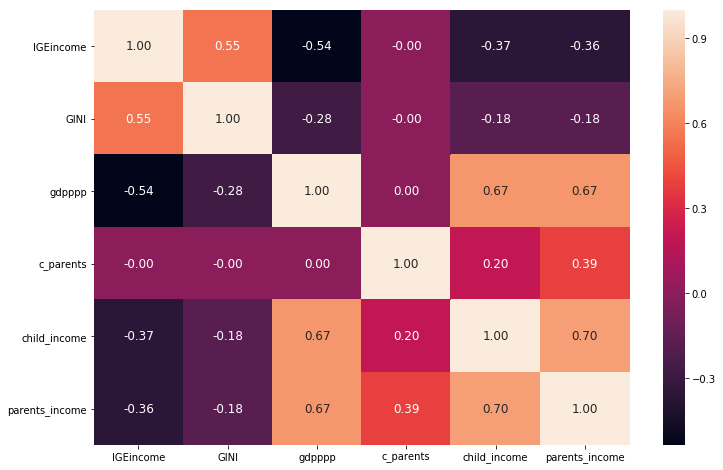

In [155]:
#CORRELATIONS
plt.figure(figsize=(12,8))
sns.heatmap(random_from[list_manova].corr(), annot=True, fmt=".2f",annot_kws={'size':12})
plt.yticks(rotation=0)
plt.savefig('./graphiques/heatmap_corr.png', dpi=120)
plt.show()

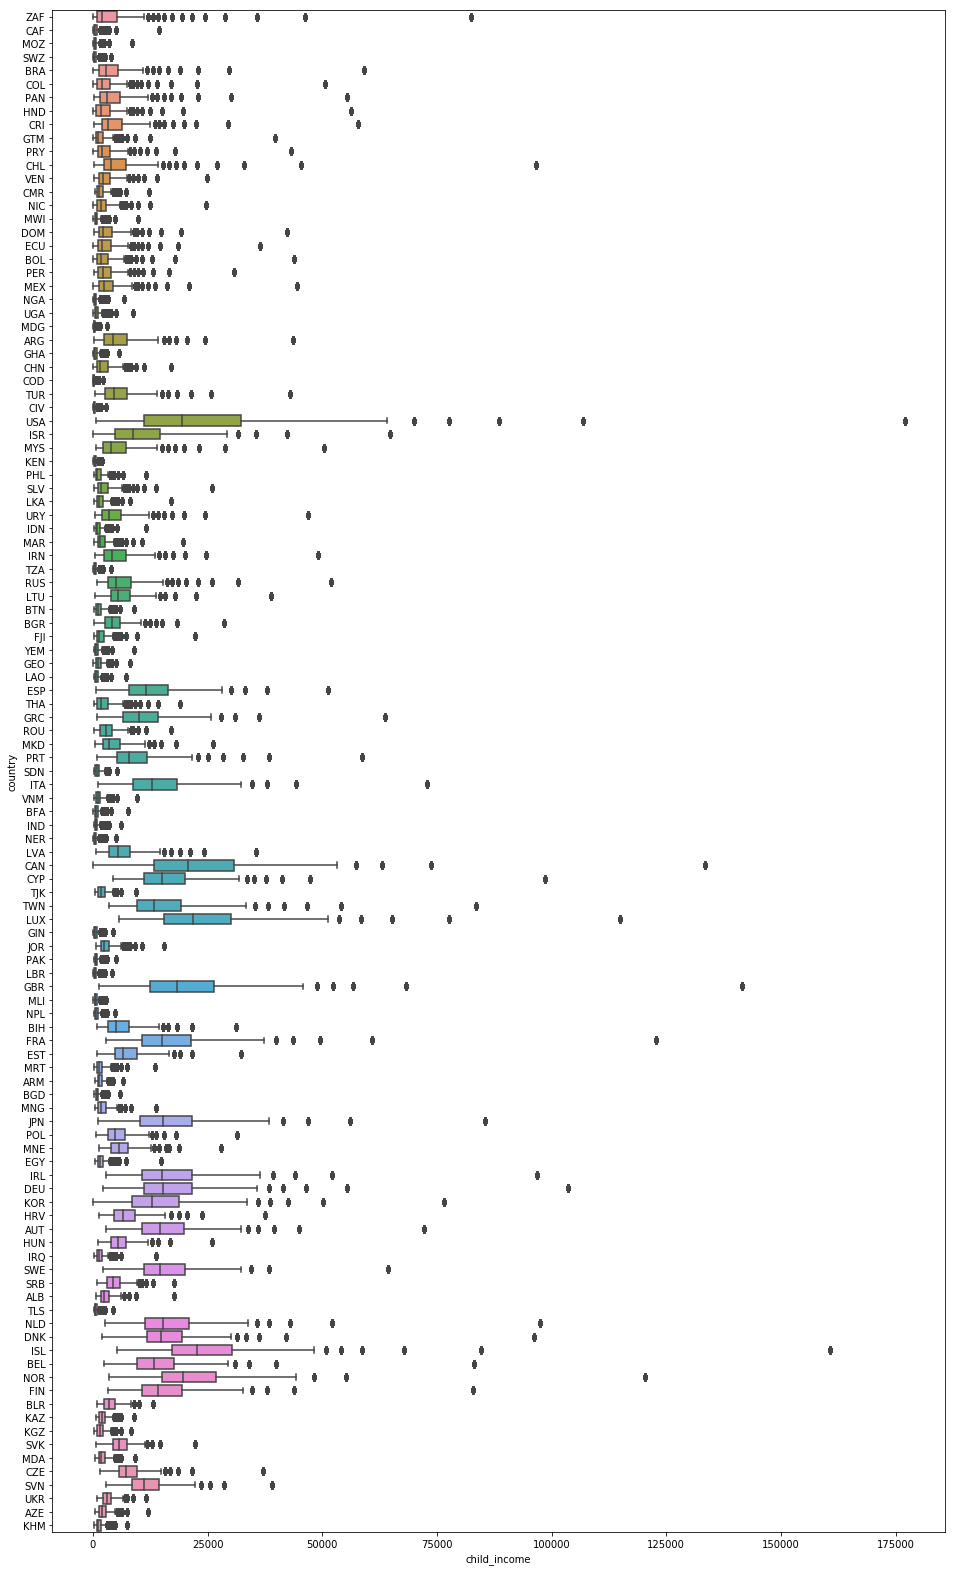

In [156]:
list_order=list(df_mission_4.sort_values(by='GINI',ascending=False).country.unique())

plt.figure(figsize=(16,28))
sns.boxplot(y='country',x='child_income', data=random_from, orient='h', order=list_order);

In [157]:
#null hypothesis: country does not influence child_income
stat_val,p_val=st.f_oneway(*(random_from[random_from['country'] == country]['child_income'] for country in liste_country_reference))
print('Stat: {}\nP: {}\n'.format(stat_val,p_val))
alpha = 0.05
if p_val > alpha:
    print('''H0 (no influence on target feature) can't be rejected''')
else:
    print('''H0 (no influence on target feature) can be rejected''')

Stat: 4898.488316066479
P: 0.0

H0 (no influence on target feature) can be rejected


#### <font color='red'> Countries influences child_income<font>

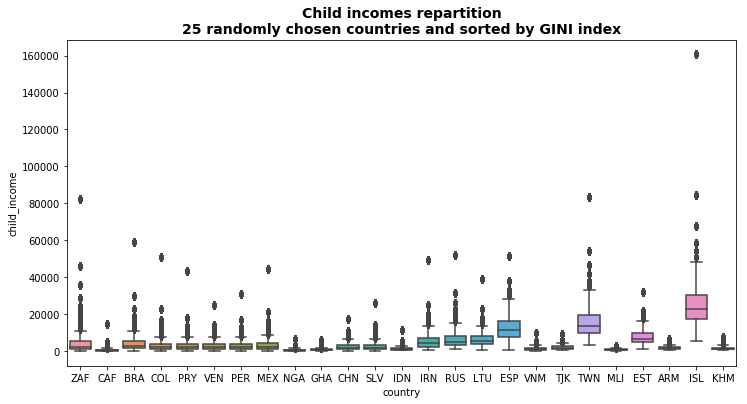

In [158]:
list_order=random.sample(liste_country_reference,25)
random_df_mission_4 = df_mission_4[df_mission_4['country'].isin(list_order)]
list_order=list(random_df_mission_4.sort_values(by='GINI',ascending=False).country.unique())
plt.figure(figsize=(12,6))
sns.boxplot(x='country',y='child_income', data=random_from, orient='v', order=list_order)
plt.title('Child incomes repartition\n25 randomly chosen countries and sorted by GINI index', fontsize=14, fontweight='bold')
plt.savefig('./graphiques/boxplot_child_incomes_25.png', dpi=120);

In [159]:
#null hypothesis: country does not influence child_income
stat_val,p_val=st.f_oneway(*(random_df_mission_4[random_df_mission_4['country'] == country]['child_income'] for country in list_order))
print('Stat: {}\nP: {}\n'.format(stat_val,p_val))
alpha = 0.05
if p_val > alpha:
    print('''H0 (no influence on target feature) can't be rejected''')
else:
    print('''H0 (no influence on target feature) can be rejected''')

Stat: 45409.078380311956
P: 0.0

H0 (no influence on target feature) can be rejected


In [160]:
results = smf.ols('child_income ~ country', data=random_from).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     4898.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:04:00   Log-Likelihood:            -5.7862e+06
No. Observations:              565000   AIC:                         1.157e+07
Df Residuals:                  564887   BIC:                         1.157e+07
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3032.8772     95.611     31.721      0.000    2845.483    3220.271
country[T.ARG]  2931.2966    134.908     21.728      0.000    2666.882    3195.711
country[T.ARM] -1397.0437    135.505    -10.310      0.000   -1662.630   -1131.458
country[T.AUT]  1.345e+04    135.329     99.356      0.000    1.32e+04    1.37e+04
country[T.AZE]  -640.4548    135.560     -4.725      0.000    -906.148    -374.762
country[T.BEL]  1.203e+04    134.842     89.240      0.000    1.18e+04    1.23e+04
country[T.BFA] -2115.8780    136.044    -15.553      0.000   -2382.521   -1849.235
country[T.BGD] -2031.8158    135.335    -15.013      0.000   -2297.069   -1766.563
country[T.BGR]  1942.3086    135.458     14.339      0.000    1676.816    2207.801
country[T.BIH]  3201.0564    136.143     23.513      0.000    2934.221    3467.892
country[T.BLR]   889.6410    135.745      6.554      0.000     623.585    1155.697
country[T.BOL]   -46.1291    135.424     -0.341      0.733    -311.555     219.297
country[T.BRA]  1940.0023    134.875     14.384      0.000    1675.652    2204.352
country[T.BTN] -1504.5449    135.587    -11.097      0.000   -1770.291   -1238.798
country[T.CAF] -2185.6372    135.087    -16.179      0.000   -2450.403   -1920.871
country[T.CAN]  2.088e+04    134.207    155.584      0.000    2.06e+04    2.11e+04
country[T.CHL]  4309.7847    134.881     31.952      0.000    4045.422    4574.148
country[T.CHN]  -552.1172    135.628     -4.071      0.000    -817.944    -286.290
country[T.CIV] -2630.2800    136.671    -19.245      0.000   -2898.151   -2362.409
country[T.CMR] -1263.3288    135.877     -9.298      0.000   -1529.643    -997.014
country[T.COD] -2757.0854    136.115    -20.256      0.000   -3023.866   -2490.305
country[T.COL]   591.1614    135.471      4.364      0.000     325.642     856.681
country[T.CRI]  2457.6556    135.161     18.183      0.000    2192.745    2722.566
country[T.CYP]  1.426e+04    135.690    105.109      0.000     1.4e+04    1.45e+04
country[T.CZE]  5033.7450    135.322     37.198      0.000    4768.518    5298.972
country[T.DEU]  1.511e+04    135.649    111.399      0.000    1.48e+04    1.54e+04
country[T.DNK]  1.386e+04    135.676    102.141      0.000    1.36e+04    1.41e+04
country[T.DOM]   590.3498    134.914      4.376      0.000     325.922     854.778
country[T.ECU]   391.2900    134.901      2.901      0.004     126.888     655.692
country[T.EGY] -1046.8926    134.914     -7.760      0.000   -1311.320    -782.465
country[T.ESP]  9987.5217    136.462     73.189      0.000    9720.060    1.03e+04
country[T.EST]  4660.5006    135.683     34.348      0.000    4394.566    4926.435
country[T.FIN]  1.334e+04    135.322     98.589      0.000    1.31e+04    1.36e+04
country[T.FJI]  -906.5175    135.485     -6.691      0.000   -1172.063    -640.972
country[T.FR

In [161]:
aov_table = sm.stats.anova_lm(results, typ=1)
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
country,2.524188e+13,112.0,2.253739e+11,4898.488316,0.0,0.4927,0.492599
Residual,2.598981e+13,564887.0,4.600887e+07,NaN,NaN,NaN,NaN


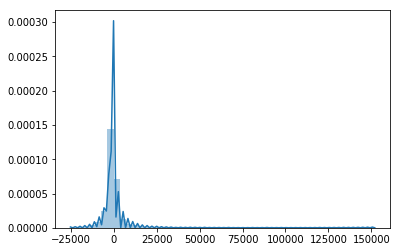

In [162]:
sns.distplot(results.resid)
plt.show()

In [163]:
st.normaltest(results.resid)

NormaltestResult(statistic=701074.33297875884, pvalue=0.0)

In [164]:
from sklearn.preprocessing import LabelEncoder  
liste_countries_random_from = np.asarray(random_from.country)
le = LabelEncoder()
liste_countries_random_from= le.fit_transform(liste_countries_random_from)

In [165]:
results = smf.ols('child_income ~ liste_countries_random_from', data=random_from).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1734.
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:04:29   Log-Likelihood:            -5.9770e+06
No. Observations:              565000   AIC:                         1.195e+07
Df Residuals:                  564998   BIC:                         1.195e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    7120.4350     25.124    283.412      0.000    7071.193    7169.677
liste_countries_random_from   -16.1624      0.388    -41.646      0.000     -16.923     -15.402
==============================================================================
Omnibus:                   542717.602   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40056471.754
Skew:                           4.550   Prob(JB):                         0.00
Kurtosis:                      43.233   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='red'>Normality tests (Jarque Berra & normaltest-Shapiro) are not significant, normality distribution of residuals can be rejected. Wich is not good for ANOVA assumptions<font>
### <font color='red'>Homoscedasticity test (Omnibus) is also not significant, homoscedascity can be rejected. Wich is not good for ANOVA assumptions<font>
### <font color='red'>Multicolinearity test (Condno) is significant (>20), multicolinearity can't be rejected. Wich is not good for ANOVA assumptions<font>
### <font color='green'>Autocorelation test (Durbin-Watson) is significant (~ 2), residuals are not autocorelated. Wich is good for ANOVA assumptions<font>

## <font color='orange'>REGRESSION LINEAIRE (sans transformation)<font>

In [166]:
random_from = df_mission_4.sample(frac=
                                  0.1)#on 10% of the DataFrame to relieve the model
random_from=random_from.sort_index(axis=0)#reorder via index (no impact, just for display facilities)
random_from=random_from.drop(columns='country')

#### <font color ='blue'> Explicated variable=inc_child, independanced variables = gdpppp and GINI<font>

In [167]:
mod = smf.ols('child_income ~ gdpppp+GINI',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 2.245e+05
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:04:29   Log-Likelihood:            -5.8133e+06
No. Observations:              565000   AIC:                         1.163e+07
Df Residuals:                  564997   BIC:                         1.163e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.7403     48.136      0.992      0.321     -46.604     142.084
gdpppp         0.4803      0.001    644.464      0.000       0.479       0.482
GINI           2.6665      1.195      2.231      0.026       0.324       5.009
==============================================================================
Omnibus:                   702398.430   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        189960245.549
Skew:                           6.607   Prob(JB):                         0.00
Kurtosis:                      91.851   Cond. No.                     9.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

#### <font color='blue'> With log variables<font>

In [168]:
mod = smf.ols('log_child_income ~ log_gdpppp+GINI',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_child_income   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 5.519e+05
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:04:30   Log-Likelihood:            -6.7984e+05
No. Observations:              565000   AIC:                         1.360e+06
Df Residuals:                  564997   BIC:                         1.360e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8333      0.010     82.489      0.000       0.813       0.853
log_gdpppp     0.8701      0.001    987.603      0.000       0.868       0.872
GINI          -0.0172      0.000   -128.733      0.000      -0.017      -0.017
==============================================================================
Omnibus:                    21097.665   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60873.599
Skew:                          -0.107   Prob(JB):                         0.00
Kurtosis:                       4.594   Cond. No.                         364.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='orange'>LOOKING FOR THE BEST FEATURES SELECTION<font>

In [169]:
X_train,X_test,y_train,y_test=train_test_split(random_from[['IGEincome','log_gdpppp','log_parents_income','GINI', 'gdpppp', 'parents_income']],random_from['log_child_income'], test_size=0.33, random_state=12)




Best combinations for scoring RSS (minimal) at each step


,numb_features,RSS,R_squared,features
2,1,203258.450437,0.720139,"(log_parents_income,)"
11,2,172231.116207,0.762859,"(log_gdpppp, log_parents_income)"
32,3,170134.862718,0.765746,"(log_gdpppp, log_parents_income, gdpppp)"
51,4,169196.399410,0.767038,"(log_gdpppp, log_parents_income, GINI, gdpppp)"
61,5,169186.663343,0.767051,"(log_gdpppp, log_parents_income, GINI, gdpppp,..."
62,6,169186.634802,0.767051,"(IGEincome, log_gdpppp, log_parents_income, GI..."




Best combinations for scoring R² (maximal) at each step


,numb_features,RSS,R_squared,features
2,1,203258.450437,0.720139,"(log_parents_income,)"
11,2,172231.116207,0.762859,"(log_gdpppp, log_parents_income)"
32,3,170134.862718,0.765746,"(log_gdpppp, log_parents_income, gdpppp)"
51,4,169196.399410,0.767038,"(log_gdpppp, log_parents_income, GINI, gdpppp)"
61,5,169186.663343,0.767051,"(log_gdpppp, log_parents_income, GINI, gdpppp,..."
62,6,169186.634802,0.767051,"(IGEincome, log_gdpppp, log_parents_income, GI..."




Resume each feature


,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,589850.728356,0.187850,"(IGEincome,)",203258.450437,0.720139
1,1,253293.304477,0.651247,"(log_gdpppp,)",203258.450437,0.720139
2,1,203258.450437,0.720139,"(log_parents_income,)",203258.450437,0.720139
3,1,670454.323859,0.076869,"(GINI,)",203258.450437,0.720139
4,1,315078.257724,0.566177,"(gdpppp,)",203258.450437,0.720139


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


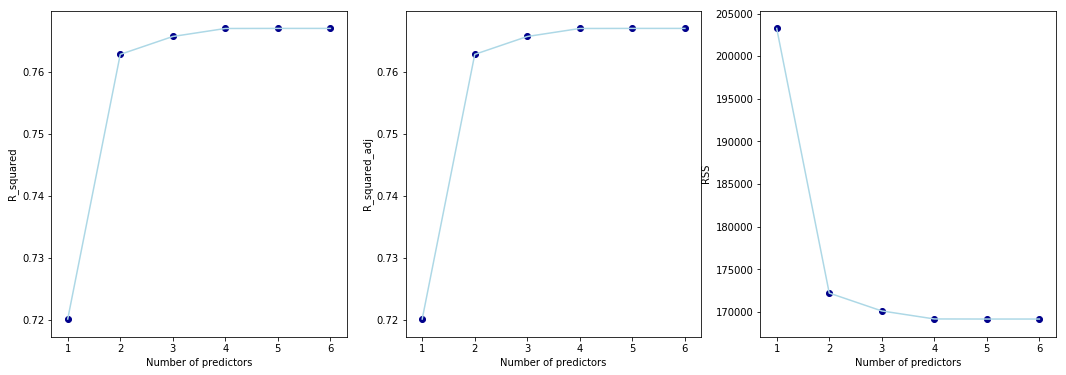

In [170]:
#Features selection for LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tnrange, tqdm_notebook #Importing tqdm for the progress bar :)
import tqdm #Importing tqdm for the progress bar :)
import itertools

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

#Initialization variables
Y = y_train
X = X_train
k = len(X.columns)
RSS_list, R_squared_list, feature_list = [],[],[]
numb_features = []

for k in tnrange(1,k + 1, desc = 'Loop...'):
    #Looping over all possible combinations of features: A,B,C,AB,AC,BC,ABC
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]#best combination at each step (feat +1)
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]#best combination at each step (feat +1)

df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)

print('\n')
print('Best combinations for scoring RSS (minimal) at each step')
display(df_min)
print('\n')
print('Best combinations for scoring R² (maximal) at each step')
display(df_max)
print('\n')
print('Resume each feature')
display(df.head())

#Initializing useful variables
m = len(Y)
hat_sigma_squared = (1/(m - k -1)) * min(df_max['RSS'])

#Calculate R_sqaured_ajusted
df_max['R_squared_adj'] = 1 - ( (1 - df_max['R_squared'])*(m-1)/(m-df_max['numb_features'] -1))

#Plot
variables = ['R_squared','R_squared_adj','RSS']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, len(variables), i+1)
    ax.plot(df_max['numb_features'],df_max[v], color = 'lightblue')
    ax.scatter(df_max['numb_features'],df_max[v], color = 'darkblue')
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('', fontsize = 16)
plt.show()

### <font color='green'>Log gdpppp and log_parents_income seem to be the most relevant<font>
### <font color='green'> However IGEincome (intergenerational elasticity) seems to be unrelevant<font>

In [171]:
mod = smf.ols('log_child_income ~ log_gdpppp + log_parents_income',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_child_income   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 9.113e+05
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:04:38   Log-Likelihood:            -5.7868e+05
No. Observations:              565000   AIC:                         1.157e+06
Df Residuals:                  564997   BIC:                         1.157e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0101      0.006     -1.577      0.115      -0.023       0.002
log_gdpppp             0.3883      0.001    319.331      0.000       0.386       0.391
log_parents_income     0.5666      0.001    516.731      0.000       0.564       0.569
==============================================================================
Omnibus:                    31994.622   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118976.350
Skew:                          -0.171   Prob(JB):                         0.00
Kurtosis:                       5.222   Cond. No.                         85.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
random_from_reduce = random_from.sample(frac=0.0001).copy()

In [173]:
mod = smf.ols('log_child_income ~ log_gdpppp+log_parents_income',data=random_from).fit()

truth=list(random_from_reduce['log_child_income'])

preds=list(mod.predict(random_from_reduce[['log_gdpppp','log_parents_income']]))

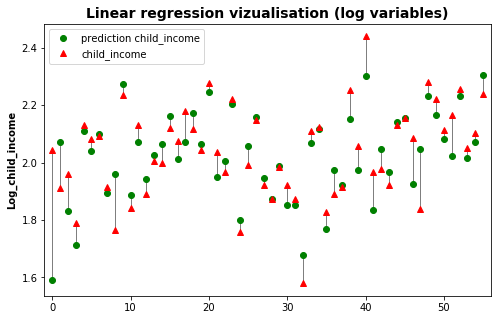

In [174]:
plt.rcParams['legend.numpoints'] = 1

log_truth=np.log(truth)
log_preds=np.log(preds)

fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(log_preds)):
    ax.plot([i,i],[log_preds[i], log_truth[i]], c="k", linewidth=0.5)
ax.plot(log_preds,'o', label='prediction child_income', color = 'g')
ax.plot(log_truth,'^', label='child_income', color = 'r' )

ax.set_xlim((-1,len(preds)))
plt.xlabel('')
plt.ylabel('Log_child_income', fontsize=10, fontweight='bold')
plt.title('Linear regression vizualisation (log variables)', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./graphiques/scatter_predict_vs_truth.png', dpi=120)
plt.show()


In [175]:
def abline(slope, intercept):
    """Plot a line from slope and intercept, borrowed from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

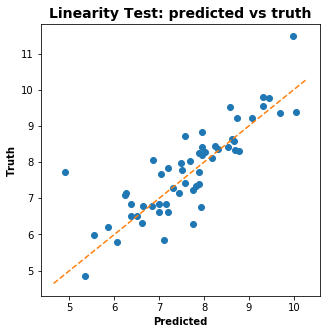

In [176]:
plt.figure(figsize=(5,5))
plt.plot(preds,truth,'o')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('Truth', fontsize=10, fontweight='bold')
plt.title('Linearity Test: predicted vs truth', fontsize=14, fontweight='bold')
abline(1,0)
plt.savefig('./graphiques/Ln_predict_vs_truth.png', dpi=120)
plt.show()


### <font color='orange'>ASSUMPTIONS OF LINEAR REGRESSION<font>
**Linear regression has five assumptions:**  

    Linear relationship
    Homoscedasticity 
    Multivariate normality
    No or little multicollinearity
    No auto-correlation 


In [177]:
mod = smf.ols('log_child_income ~ log_gdpppp+log_parents_income',data=random_from ).fit()
mod.rsquared,mod.rsquared_adj

(0.76335757245431102, 0.76335673477755328)

#### <font color='b'>LINEAR RELATIONSHIP<font>  
Linear regression needs the relationship between the independent and dependent variables to be linear.

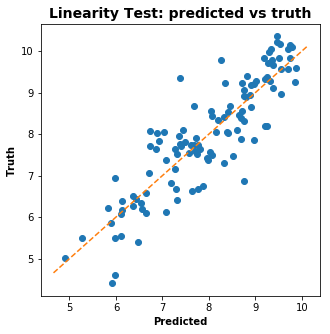

In [178]:
#graphic illustration of the linear regression
random_from_reduce2 = random_from.sample(frac=0.0002).copy()
truth2=list(random_from_reduce2['log_child_income'])

preds2=list(mod.predict(random_from_reduce2[['IGEincome','log_gdpppp','log_parents_income','GINI']]))

plt.figure(figsize=(5,5))
plt.plot(preds2,truth2,'o')
plt.xlabel('Predicted', fontsize=10, fontweight='bold')
plt.ylabel('Truth', fontsize=10, fontweight='bold')
plt.title('Linearity Test: predicted vs truth', fontsize=14, fontweight='bold')
abline(1,0)
plt.savefig('./graphiques/Ln_more_predict_vs_truth.png', dpi=120)
plt.show()

<Figure size 432x432 with 0 Axes>

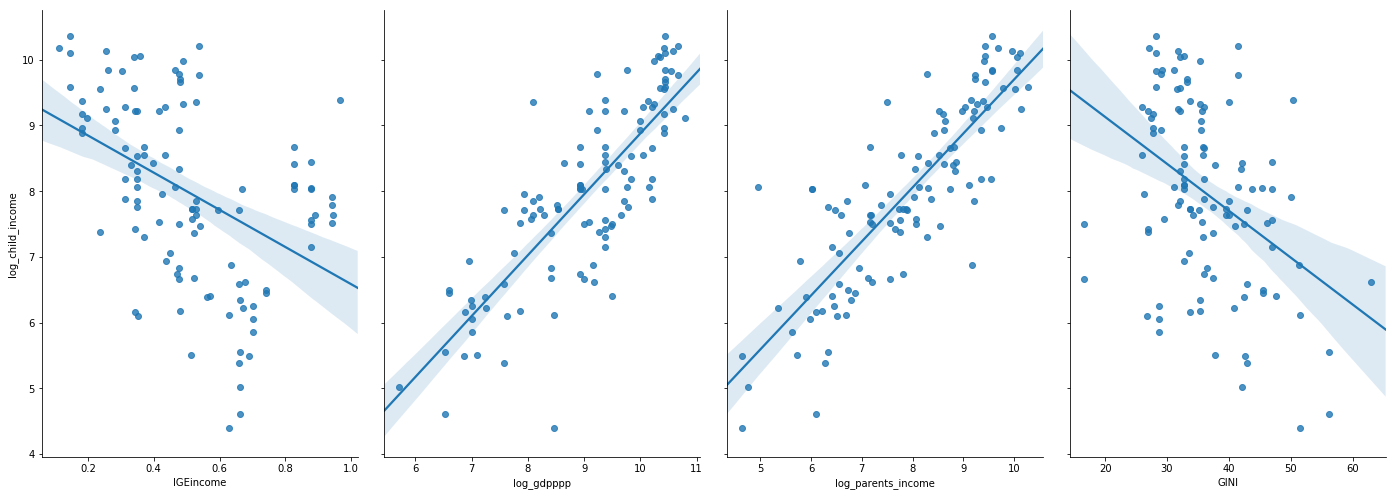

In [179]:
plt.figure(figsize=(6,6))
sns.pairplot(random_from_reduce2, x_vars=['IGEincome','log_gdpppp','log_parents_income','GINI'], y_vars='log_child_income', height=7, aspect=0.7, kind='reg')
plt.savefig('./graphiques/Ln_pairplot.png', dpi=120)
plt.show()

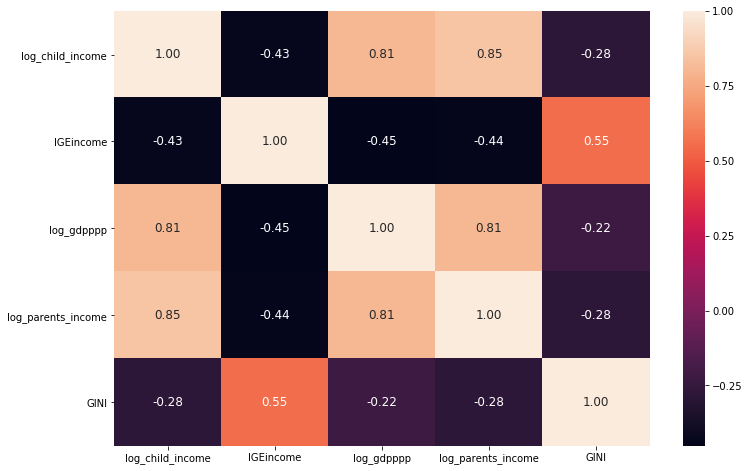

In [180]:
#PEARSON
plt.figure(figsize=(12,8))
sns.heatmap(random_from[['log_child_income','IGEincome','log_gdpppp','log_parents_income','GINI']].corr(), annot=True, fmt=".2f",annot_kws={'size':12})
plt.yticks(rotation=0)
plt.savefig('./graphiques/heatmap_corr_w_log.png', dpi=120)
plt.show()

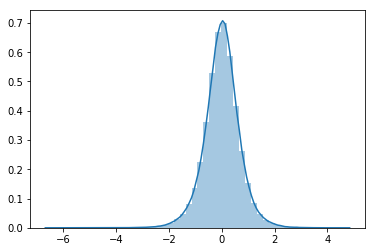

In [181]:
sns.distplot(mod.resid)
plt.show()

In [182]:
st.normaltest(mod.resid)

NormaltestResult(statistic=31994.622009402621, pvalue=0.0)

### <font color='red'>It does not look so bad,...

#### <font color='b'>HOMOSCEDASTICITY<font>

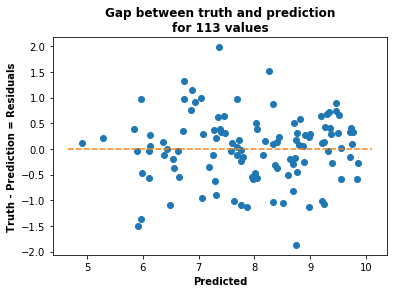

In [183]:
plt.plot(preds2,np.array(truth2)-np.array(preds2),'o')
plt.xlabel('Predicted',fontsize=10, fontweight='bold')
plt.ylabel('Truth - Prediction = Residuals',fontsize=10, fontweight='bold')
plt.title('Gap between truth and prediction\nfor {} values'.format(len(preds2)),fontsize=12, fontweight='bold')
abline(0,0)
plt.savefig('./graphiques/scatter_gap_predicted_truth.png', dpi=120)
plt.show()

In [184]:
# Heteroscédasticity Test: constant variance of the residuals
#Null hypothesis: homoscédasticity can't be rejected

fval,pval=statsmodels.stats.diagnostic.het_breuschpagan(mod.resid, mod.model.exog)[2:]
print('F =',fval,'\nP =',pval)
if pval<0.05:
    print('''L'hypothèse nulle d'homoscédasticité des résidus peut être rejettée: trop peu probable d'obtenir une telle valeur F dans l'hypothèse d'homoscédasticité des résidus.\nNOUS POUVONS CONSIDERER QU'IL Y A HETEROSCEDASTICITE.''')
else:
    print('''L'hypothèse nulle d'homoscédasticité des résidus ne peut pas être rejettée: car, nous avons une probabilité sgnificative d'avoir une telle valeur statistique F dans l'hypothèse d'homoscédasticité des résidus'''.format(pval,fval))

F = 1326.08745328 
P = 0.0
L'hypothèse nulle d'homoscédasticité des résidus peut être rejettée: trop peu probable d'obtenir une telle valeur F dans l'hypothèse d'homoscédasticité des résidus.
NOUS POUVONS CONSIDERER QU'IL Y A HETEROSCEDASTICITE.


#### <font color='b'>GAUSSIAN DISTRIBUTION OF RESIDUALS</font> 

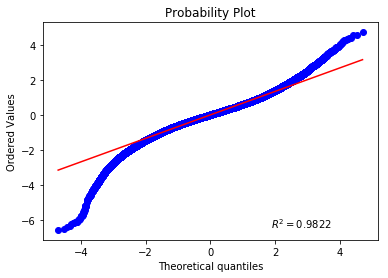

In [185]:
#Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default)
fig, ax = plt.subplots(figsize=(6,4))
scipy.stats.probplot(mod.resid, plot=ax, fit=True, rvalue=True)
plt.savefig('./graphiques/residuals_qq_plot.png', dpi=120)
plt.show()

In [186]:
#Null Hypothesis: gaussian can't be rejected
st.normaltest(a=mod.resid)

NormaltestResult(statistic=31994.622009402621, pvalue=0.0)

In [187]:
#Null Hypothesis: gaussian can't be rejected
st.normaltest(a=np.round(mod.resid,2))

NormaltestResult(statistic=31990.632055254471, pvalue=0.0)

#### <font color='b'>NO CORRELATION</font>  

In [188]:
#Null Hypothesis: no correlation -> ~1.9<dw<2.1~
dw=statsmodels.stats.stattools.durbin_watson(mod.resid)
if 1.9<dw<2.1:
    print('''La valeur statistique du test de Durbin-Watson est de {:.3f}\nL'hypothèse nulle ne peut être rejetée'''.format(dw))
elif dw<1.9:
    print('''La valeur statistique du test de Durbin-Watson est de {:.3f}\nL'hypothèse nulle peut être rejetée car il semble y avoir une corrélation positive'''.format(dw))
elif dw>2.1:
    print('''La valeur statistique du test de Durbin-Watson est de {:.3f}\nL'hypothèse nulle peut être rejetée car il semble y avoir une corrélation négative'''.format(dw))

La valeur statistique du test de Durbin-Watson est de 0.436
L'hypothèse nulle peut être rejetée car il semble y avoir une corrélation positive


In [189]:
np.linalg.cond(mod.model.exog)

85.813584568561353

In [190]:
# ACP (untransformed features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [191]:
random_from_CR = scaler.fit_transform(random_from[['parents_income','IGEincome','GINI','gdpppp','log_gdpppp','log_parents_income','log_child_income']])
random_from_CR = pd.DataFrame(random_from_CR, columns=['parents_income','IGEincome','GINI','gdpppp','log_gdpppp','log_parents_income','log_child_income'])

In [192]:
random_from_CR.head()

,parents_income,IGEincome,GINI,gdpppp,log_gdpppp,log_parents_income,log_child_income
0,-0.573441,1.188854,-0.919602,-0.40029,0.073885,-0.918992,-0.918581
1,-0.573441,1.188854,-0.919602,-0.40029,0.073885,-0.918992,-0.918581
2,-0.573441,1.188854,-0.919602,-0.40029,0.073885,-0.918992,-0.918581
3,-0.573441,1.188854,-0.919602,-0.40029,0.073885,-0.918992,-0.918581
4,-0.573441,1.188854,-0.919602,-0.40029,0.073885,-0.918992,-0.918581


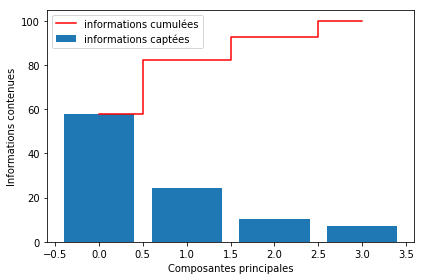

In [193]:
pca = PCA().fit(random_from_CR[['parents_income','IGEincome','GINI','gdpppp']])
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
#plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

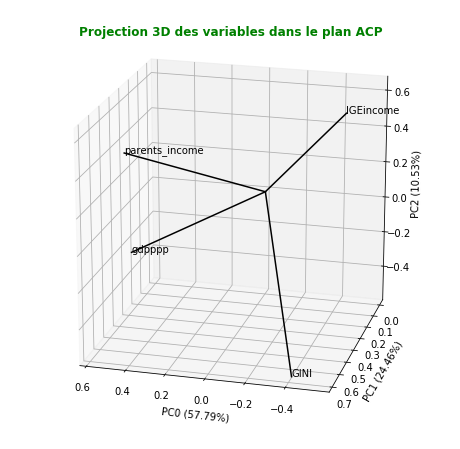

Inertie respective des variables sur les principales composantes:
      parents_income  IGEincome    GINI  gdpppp
PC0          0.4880    -0.5355 -0.4106  0.5537
PC1          0.5408     0.3299  0.6886  0.3530
PC2          0.4588     0.6514 -0.5710 -0.1978
PC3          0.5089    -0.4244  0.1768 -0.7278


In [194]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

nrange= len(random_from_CR[['parents_income','IGEincome','GINI','gdpppp']].columns)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, random_from_CR.columns[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
#plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR[['parents_income','IGEincome','GINI','gdpppp']].keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [195]:
#ACP (log transformed features)

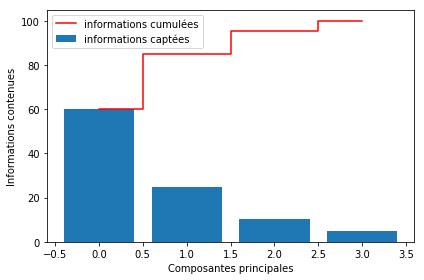

In [196]:
pca = PCA().fit(random_from_CR[['log_parents_income','IGEincome','GINI','log_gdpppp']])
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
#plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

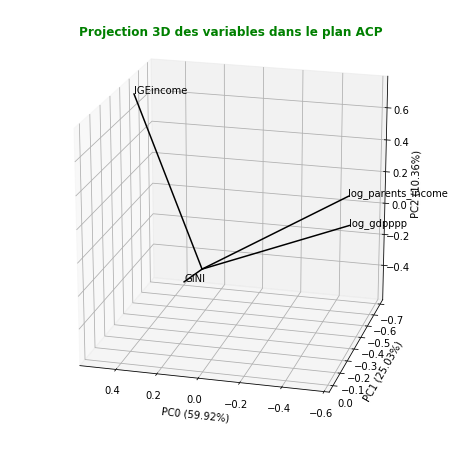

Inertie respective des variables sur les principales composantes:
      log_parents_income  IGEincome      GINI  log_gdpppp
PC0           -0.547639   0.501508  0.393947   -0.541652
PC1           -0.410257  -0.389769 -0.691489   -0.449014
PC2            0.238870   0.766004 -0.595816    0.034382
PC3           -0.689001   0.099035 -0.107946    0.709801


In [197]:
nrange= len(random_from_CR.columns)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, random_from_CR[['log_parents_income','IGEincome','GINI','log_gdpppp']].columns[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
#plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR[['log_parents_income','IGEincome','GINI','log_gdpppp']].keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [198]:
#Pourcentage de la population mondiale?
pop_mission = df_pop2017['2017'][df_pop2017['Country Code'].isin(liste_country_reference)].sum()
pop_prop_inmission= 100*pop_mission/pop2017
print('Pourcentage de la population mondiale: {:.2f}%'.format(pop_prop_inmission))

Pourcentage de la population mondiale: 88.57%


### <font color='blue'>IMPROVING MODEL</font>

####  <font color='green'>Adding parents education years ('MEANp' in GDIM).<font>
Pb: tous les pays de la dataframe df_mission_4 ne sont pas renseignés sur cette variable.
Solution: calculer cet indice en se référant aux pays qui correspondent le mieux à chaque pays manquant (region, incgroup2 & incgroup4).  
Pour 'cohort'=1980

In [199]:
#respect some characteristics
df_GDIM_fit = df_GDIM_2018[df_GDIM_2018['parent'].isin({'avg'})&df_GDIM_2018['child'].isin({'all'})]

In [200]:
df_GDIM_fit=pd.DataFrame(df_GDIM_fit)

In [201]:
df_GDIM_fit['region']=df_GDIM_fit['region'].astype(str)
df_GDIM_fit['incgroup2']=df_GDIM_fit['incgroup2'].astype(str)
df_GDIM_fit['incgroup4']=df_GDIM_fit['incgroup4'].astype(str)

In [202]:
liste_country_MEANp=[]
liste_pays2=[]
liste_ss=[]
for pays in liste_country_reference:
    MEANp=df_GDIM_fit['MEANp'][df_GDIM_fit['iso3'].isin({pays})&df_GDIM_fit['cohort'].isin({'1980'})]
    MEANp=MEANp.values
    if MEANp !=0:
        MEANp=float(MEANp)
        liste_pays2.append(pays)
        liste_country_MEANp.append(MEANp)
    else:
        zone=df_GDIM_2018['region'].loc[df_GDIM_2018['iso3'].isin({pays})&df_GDIM_2018['cohort'].isin({'1980'})].unique()
        grp2=df_GDIM_2018['incgroup2'].loc[df_GDIM_2018['iso3'].isin({pays})&df_GDIM_2018['cohort'].isin({'1980'})].unique()
        grp4=df_GDIM_2018['incgroup4'].loc[df_GDIM_2018['iso3'].isin({pays})&df_GDIM_2018['cohort'].isin({'1980'})].unique()
        
        df=df_GDIM_fit[['iso3','MEANp']][df_GDIM_fit['region'].isin(zone)&df_GDIM_fit['incgroup2'].isin(grp2)&df_GDIM_fit['incgroup4'].isin(grp4)&df_GDIM_fit['cohort'].isin({'1980'})]
        df=df.dropna()
        xMEANp=df.MEANp.mean()
        
        liste_pays2.append(pays)
        liste_country_MEANp.append(xMEANp)

In [203]:
df_add_features = pd.DataFrame({'country':liste_pays2,'years_education_parents':liste_country_MEANp})

In [204]:
df_mission_5=df_mission_4.copy()
df_mission_5=df_mission_5.merge(df_add_features,how='right',on='country',left_index=False,right_index=False)

In [205]:
df_mission_5.isna().sum()

country                        0
c_parents                      0
parents_income                 0
c_child                        0
child_income                   0
IGEincome                      0
GINI                           0
gdpppp                         0
log_child_income               0
log_parents_income             0
log_gdpppp                     0
years_education_parents    50000
dtype: int64

#### <font color='red'>Are some countries not spefified (years_education_parents)?<font>

In [206]:
df_mission_5[df_mission_5["years_education_parents"].isnull()]["country"].unique()

array(['LUX'], dtype=object)

#### <font color='red'>LUXEMBOURG<font>  

Solution: we can handly correct that:  
-region: 'High income'  
-incgroup2: 'High-income economies'  
-incgroup4: 'High income'

In [207]:
list_countries=list(df_mission_5.country.unique())

#countries having region= 'High income'
list_country_region=list(df_GDIM_2018.iso3[df_GDIM_2018['region'].isin({'High income'})].unique())
#be sure we have MEAMp(years_education_parents) in our DataFrame
list_country_region=[x for x in list_country_region if x in list_countries]

#countries having -incgroup2: 'High-income economies'
list_country_incgroup2=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup2'].isin({'High-income economies'})].unique())
#be sure we have MEAMp(years_education_parents) in our DataFrame
list_country_incgroup2=[x for x in list_country_incgroup2 if x in list_countries]
list_country_incgroup2

#countries having -incgroup4: 'High income'
list_country_incgroup4=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup4'].isin({'High income'})].unique())
#be sure we have MEAMp(years_education_parents) in our DataFrame
list_country_incgroup4=[x for x in list_country_incgroup2 if x in list_countries]

#droping countries not in 3 lists above
list_countries_LUX = [x for x in list_countries if x in (list_country_region and list_country_incgroup2 and list_country_incgroup4)]

#calculate MEAMp(years_education_parents) for LUX
LUXMEANp = df_mission_5.years_education_parents[df_mission_5['country'].isin(list_countries)].mean()
LUXMEANp

7.7084789509955565

#### <font color='red'>Replacing LUX MEANp='NaN'<font>

In [208]:
df_mission_5.loc[df_mission_5['country']=='LUX', 'years_education_parents'] = LUXMEANp

### <font color='orange'>DOES IT IMPROVE LINEAR REGRESSION?<font>

In [209]:
random_from = df_mission_5.sample(frac=0.1)
random_from = random_from.sort_index(axis=0)

random_from['log_child_income']=np.log(random_from['child_income'])
random_from['log_parents_income']=np.log(random_from['parents_income'])
random_from['log_gdpppp']=np.log(random_from['gdpppp'])

In [210]:
mod = smf.ols('log_child_income ~ log_parents_income+log_gdpppp+years_education_parents',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_child_income   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 6.089e+05
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:04:52   Log-Likelihood:            -5.7793e+05
No. Observations:              565000   AIC:                         1.156e+06
Df Residuals:                  564996   BIC:                         1.156e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1415      0.008     18.064      0.000       0.126       0.157
log_parents_income          0.5647      0.001    514.127      0.000       0.562       0.567
log_gdpppp                  0.3631      0.001    253.770      0.000       0.360       0.366
years_education_parents     0.0111      0.000     30.837      0.000       0.010       0.012
==============================================================================
Omnibus:                    33168.621   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130667.920
Skew:                          -0.157   Prob(JB):                         0.00
Kurtosis:                       5.335   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='orange'>NOT REALLY<font>

###  <font color='green'>Adding more features<font>
About missing values: solution will depend of the quantity of missing values.

In [211]:
list_to_add=list(['iso3','fragile','MEANc', 'GINIp','GINIc','COR','MAcatM','MAcatC1','MLD_psu'])

In [212]:
df=df_GDIM_2018[list_to_add]
df=df[df['iso3'].isin(liste_country_reference)]

In [213]:
df=df.groupby(by='iso3', as_index=False).mean()

In [214]:
df.isna().sum()

iso3        0
fragile     0
MEANc       1
GINIp       1
GINIc       1
COR         1
MAcatM      1
MAcatC1     1
MLD_psu    23
dtype: int64

In [215]:
for x in list_to_add:
    print(x,df[df[x].isnull()]['iso3'].unique())

iso3 []
fragile []
MEANc ['LUX']
GINIp ['LUX']
GINIc ['LUX']
COR ['LUX']
MAcatM ['LUX']
MAcatC1 ['LUX']
MLD_psu ['BOL' 'BRA' 'CAN' 'COL' 'CYP' 'DNK' 'EST' 'FIN' 'FJI' 'IRN' 'ISR' 'JPN'
 'KEN' 'KHM' 'LUX' 'MEX' 'MYS' 'NLD' 'NOR' 'PHL' 'SWE' 'THA' 'YEM']


### <font color='red'> We'll approximate values for Luxembourg but we'll remove the MLD_psu column<font>

In [216]:
df=df.drop(columns='MLD_psu')

In [217]:
#update list_to_add
list_to_add=list(['fragile','MEANc', 'GINIp','GINIc','COR','MAcatM','MAcatC1'])

In [218]:
for feat in list_to_add:
    reg=df_GDIM_2018.region[df_GDIM_2018['iso3']=='LUX']
    inc2=df_GDIM_2018.incgroup2[df_GDIM_2018['iso3']=='LUX']
    inc4=df_GDIM_2018.incgroup4[df_GDIM_2018['iso3']=='LUX']
    #countries having region= 'High income'
    list_country_region=list(df_GDIM_2018.iso3[df_GDIM_2018['region'].isin({'High income'})].unique())
    #be sure we have MEAMp(years_education_parents) in our DataFrame
    list_country_region=[x for x in list_country_region if x in list_countries]

    #countries having -incgroup2: 'High-income economies'
    list_country_incgroup2=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup2'].isin({'High-income economies'})].unique())
    #be sure we have MEAMp(years_education_parents) in our DataFrame
    list_country_incgroup2=[x for x in list_country_incgroup2 if x in list_countries]
    list_country_incgroup2

    #countries having -incgroup4: 'High income'
    list_country_incgroup4=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup4'].isin({'High income'})].unique())
    #be sure we have MEAMp(years_education_parents) in our DataFrame
    list_country_incgroup4=[x for x in list_country_incgroup2 if x in list_countries]

    #droping countries not in 3 lists above
    list_countries_LUX = [x for x in list_countries if x in (list_country_region and list_country_incgroup2 and list_country_incgroup4)]

    #calculate and replace for LUX
    x = df[feat][df['iso3'].isin(list_countries)].mean()
    df.loc[df['iso3']=='LUX', feat] = x

In [219]:
df.head()

,iso3,fragile,MEANc,GINIp,GINIc,COR,MAcatM,MAcatC1
0,ALB,0.0,10.651462,0.288985,0.213154,0.409681,0.684890,0.680187
1,ARG,0.0,10.184091,0.300777,0.191071,0.530331,0.576302,0.582422
2,ARM,0.0,10.833439,0.196067,0.147798,0.430577,0.423728,0.397172
3,AUT,0.0,12.976673,0.184047,0.131882,0.453838,0.479345,0.443957
4,AZE,0.0,10.793326,0.144751,0.093450,0.275103,0.380274,0.348007


In [220]:
df.isna().sum()

iso3       0
fragile    0
MEANc      0
GINIp      0
GINIc      0
COR        0
MAcatM     0
MAcatC1    0
dtype: int64

In [221]:
df_mission_5_2=df_mission_5.merge(df, left_on='country', right_on='iso3', left_index=False, right_index=False)

In [222]:
df_mission_5_2.isna().sum()

country                    0
c_parents                  0
parents_income             0
c_child                    0
child_income               0
IGEincome                  0
GINI                       0
gdpppp                     0
log_child_income           0
log_parents_income         0
log_gdpppp                 0
years_education_parents    0
iso3                       0
fragile                    0
MEANc                      0
GINIp                      0
GINIc                      0
COR                        0
MAcatM                     0
MAcatC1                    0
dtype: int64

In [223]:
df_mission_5_2['log_parents_income']=np.log(df_mission_5_2['parents_income'])
df_mission_5_2['log_gdpppp']=np.log(df_mission_5_2['gdpppp'])
df_mission_5_2['log_child_income']=np.log(df_mission_5_2['child_income'])

In [224]:
#df_mission_5_2.describe()

In [225]:
#rp.summary_cat(df_mission_5_2[['c_parents','c_child']])

In [226]:
random_from = df_mission_5_2.sample(frac=0.1)

In [227]:
mod = smf.ols('log_child_income ~ IGEincome+log_parents_income+GINI+log_gdpppp+years_education_parents+fragile+MEANc+GINIp+GINIc+COR+MAcatM+MAcatC1',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_child_income   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.542e+05
Date:                Tue, 12 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:05:06   Log-Likelihood:            -5.7475e+05
No. Observations:              565000   AIC:                         1.150e+06
Df Residuals:                  564987   BIC:                         1.150e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0147      0.016     -0.906      0.365      -0.047       0.017
IGEincome                  -0.0562      0.006    -10.055      0.000      -0.067      -0.045
log_parents_income          0.5430      0.001    486.775      0.000       0.541       0.545
GINI                       -0.0059      0.000    -40.478      0.000      -0.006      -0.006
log_gdpppp                  0.3745      0.002    226.363      0.000       0.371       0.378
years_education_parents     0.0163      0.001     19.664      0.000       0.015       0.018
fragile                     0.0407      0.004     10.371      0.000       0.033       0.048
MEANc                       0.0303      0.001     21.872      0.000       0.028       0.033
GINIp                       0.0088      0.013      0.688      0.491      -0.016       0.034
GINIc                       0.6327      0.022     28.802      0.000       0.590       0.676
COR                        -0.0486      0.011     -4.258      0.000      -0.071      -0.026
MAcatM                     -3.2901      0.092    -35.598      0.000      -3.471      -3.109
MAcatC1                     3.2923      0.087     37.699      0.000       3.121       3.463
==============================================================================
Omnibus:                    33969.063   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148632.596
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       5.507   Cond. No.                     5.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
features=['IGEincome','log_parents_income','GINI','log_gdpppp','years_education_parents','fragile','MEANc','GINIp','GINIc','COR','MAcatM','MAcatC1']

In [229]:
# Is there a better model to use?
from sklearn.pipeline import Pipeline #assemble several steps (transformation and/or parameters) that can be cross-validated together while setting different parameters. 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

X_train,X_test,Y_train,Y_test=train_test_split(random_from[features],random_from['log_child_income'], test_size=0.33, random_state=12)

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='explained_variance')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.765852 (0.002313)
ScaledLASSO: 0.198627 (0.001133)
ScaledEN: 0.525490 (0.001948)
ScaledKNN: 0.744772 (0.003508)
ScaledCART: 0.779681 (0.002435)
ScaledGBM: 0.780313 (0.002100)


In [230]:
features=list(['parents_income','log_parents_income','IGEincome','GINI','log_gdpppp','years_education_parents','fragile','MEANc', 'GINIp','GINIc','COR','MAcatM','MAcatC1'])
random_from_CR = pd.DataFrame(scaler.fit_transform(random_from[features]),columns=features)
random_from_CR = random_from_CR.merge(random_from[['child_income','log_child_income']],left_index=True,right_index=True)
random_from_CR.head()

,parents_income,log_parents_income,IGEincome,GINI,log_gdpppp,years_education_parents,fragile,MEANc,GINIp,GINIc,COR,MAcatM,MAcatC1,child_income,log_child_income
13,-0.219363,0.329242,-0.874490,0.100049,0.777523,1.386985,-0.296662,1.088662,-0.857564,-0.964001,-1.165898,0.882128,0.791515,728.89795,6.591534
15,-0.306028,0.167693,1.238882,-0.470623,0.092708,0.429215,-0.296662,0.060292,-0.343525,-0.308058,0.252301,0.355047,0.402251,728.89795,6.591534
38,-0.561506,-0.802121,2.132848,1.022839,0.102085,-0.109022,-0.296662,-0.168173,-0.257137,0.160601,1.563708,-0.108693,-0.124188,728.89795,6.591534
51,0.123891,0.751296,-0.495254,-1.296277,1.000880,1.347443,-0.296662,1.053378,-1.466233,-1.030395,-0.321055,-1.520214,-1.711410,728.89795,6.591534
63,-0.531334,-0.593897,-0.535932,-0.312778,-1.064775,0.734076,-0.296662,0.677445,-1.145125,-1.024222,-1.172387,0.376230,0.506523,728.89795,6.591534


In [231]:
from scipy.cluster.hierarchy import linkage, fcluster, cophenet
def plot_dendrogram(Z, names,to_save,namefile, distance_color):
    plt.figure(figsize=(20,25))
    plt.title('',fontsize=14, fontweight='bold')
    dendrogram(Z,
       labels = names, color_threshold=distance_color,
       #orientation = "left"
              )
    if to_save is not None:
        plt.savefig('./Graphiques/{}.png'.format(namefile), dpi=120)
    else:
        pass
    plt.show()

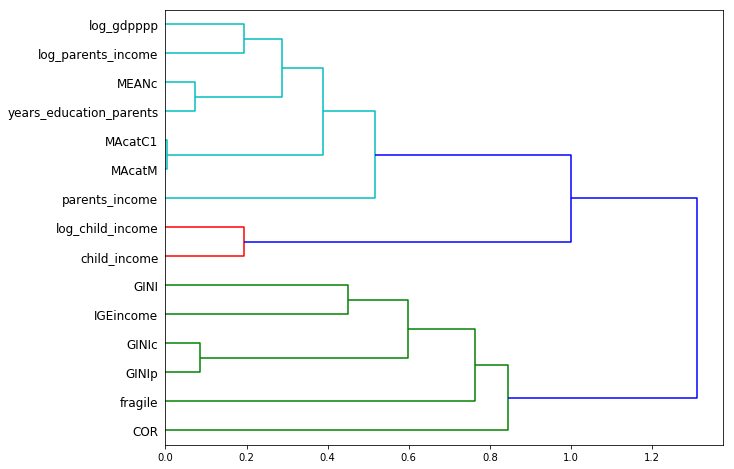

In [232]:
from scipy.cluster import hierarchy as hc
corr = 1 - random_from_CR.corr() 

plt.figure(figsize=(10,8))
corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns,orientation='right')
plt.show()

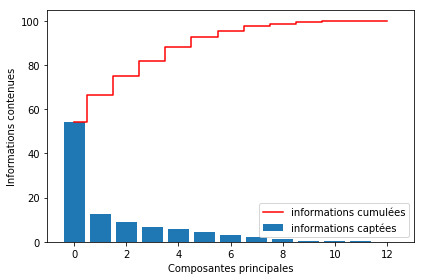

In [233]:
pca = PCA().fit(random_from_CR[features])
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
#plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

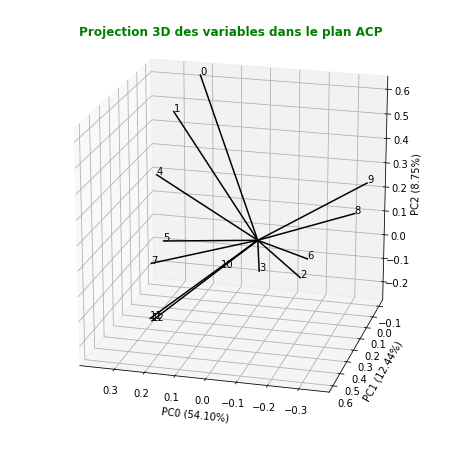

Inertie respective des variables sur les principales composantes:
       parents_income  log_parents_income  IGEincome      GINI  log_gdpppp  \
PC0         0.215923            0.292570  -0.237664 -0.153006    0.322495   
PC1        -0.069746           -0.013504   0.381534  0.576210    0.091579   
PC2         0.633939            0.497944   0.035039  0.135157    0.274184   
PC3         0.222682            0.050387  -0.166624 -0.010876   -0.090617   
PC4         0.165400            0.094088   0.072948 -0.009368   -0.024706   
PC5         0.099660            0.012927   0.478261  0.441452   -0.007422   
PC6        -0.015190            0.167144   0.719541 -0.644537    0.016718   
PC7         0.600888           -0.290970   0.033494 -0.049276   -0.652112   
PC8         0.311477           -0.734369   0.077702 -0.099998    0.548482   
PC9         0.021276           -0.037107  -0.045089  0.009201    0.246772   
PC10        0.012268           -0.032137   0.088036 -0.005000    0.028554   
PC11     

In [234]:
nrange= len(features)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, np.arange(0,nrange,1)[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
#plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR[features].keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [235]:
#Coordonates in PCA
pca3 = PCA(n_components=6).fit_transform(random_from_CR[features])
pca_coordonates=pd.DataFrame(data=pca3, columns=['PC0', 'PC1','PC2','PC3','PC4','PC5'])
#index = pd.DataFrame(random_from_CR[features].index)
#final = pd.concat([pca_coordonates, index], axis=1)
#final = final.set_index(index.columns[0])

In [236]:
final = pd.concat([pca_coordonates, random_from_CR.reset_index(drop=True)], axis=1, sort=False)

In [237]:
final=final.multiply(10)

In [238]:
final.head(5)

,PC0,PC1,PC2,PC3,PC4,PC5,parents_income,log_parents_income,IGEincome,GINI,log_gdpppp,years_education_parents,fragile,MEANc,GINIp,GINIc,COR,MAcatM,MAcatC1,child_income,log_child_income
0,25.638527,-3.825098,-9.270222,-1.636887,1.126828,8.192904,-2.193627,3.292417,-8.744901,1.000492,7.775225,13.869846,-2.966622,10.886624,-8.575637,-9.640013,-11.658983,8.821278,7.915154,7288.9795,65.915337
1,4.376221,6.075299,-3.949024,-4.299365,0.062752,2.590362,-3.060282,1.676934,12.388821,-4.706233,0.927082,4.292150,-2.966622,0.602917,-3.435247,-3.080577,2.523013,3.550474,4.022515,7288.9795,65.915337
2,-11.392544,23.433054,-1.764465,-6.758986,-7.689887,3.659315,-5.615057,-8.021206,21.328479,10.228388,1.020852,-1.090221,-2.966622,-1.681729,-2.571372,1.606012,15.637082,-1.086926,-1.241881,7288.9795,65.915337
3,16.648179,-17.964771,6.689158,-7.862219,-26.287373,5.430962,1.238905,7.512957,-4.952537,-12.962772,10.008800,13.474428,-2.966622,10.533783,-14.662334,-10.303949,-3.210554,-15.202144,-17.114100,7288.9795,65.915337
4,11.197244,-8.028833,-18.953833,-2.724883,-1.793519,7.357872,-5.313342,-5.938966,-5.359318,-3.127777,-10.647750,7.340756,-2.966622,6.774452,-11.451253,-10.242216,-11.723875,3.762301,5.065232,7288.9795,65.915337


In [239]:
mod = smf.ols('log_child_income ~PC0+PC1+PC2+PC3+PC4+PC5',data=final).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_child_income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7115
Date:                Tue, 12 Feb 2019   Prob (F-statistic):              0.640
Time:                        15:13:16   Log-Likelihood:            -2.1566e+05
No. Observations:               56125   AIC:                         4.313e+05
Df Residuals:                   56118   BIC:                         4.314e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.0343      0.048   1680.045      0.000      79.941      80.128
PC0            0.0002      0.002      0.133      0.894      -0.003       0.004
PC1           -0.0032      0.004     -0.861      0.389      -0.011       0.004
PC2           -0.0036      0.004     -0.806      0.420      -0.012       0.005
PC3            0.0081      0.005      1.583      0.113      -0.002       0.018
PC4            0.0030      0.005      0.549      0.583      -0.008       0.014
PC5            0.0014      0.006      0.228      0.820      -0.011       0.014
==============================================================================
Omnibus:                      303.623   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.029
Skew:                          -0.013   Prob(JB):                     7.46e-48
Kurtosis:                       2.696   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
X_train.head()

,IGEincome,log_parents_income,GINI,log_gdpppp,years_education_parents,fragile,MEANc,GINIp,GINIc,COR,MAcatM,MAcatC1
142603,0.424817,7.763896,32.5,8.632484,11.493134,0.0,10.833439,0.196067,0.147798,0.430577,0.423728,0.397172
5583654,0.916461,6.932028,36.7,7.707063,2.588181,1.0,9.010527,0.744851,0.318118,0.347510,0.682856,0.682198
2419681,0.517398,7.067264,29.5,8.061802,3.136208,1.0,5.332905,0.868239,0.579411,0.342975,0.477120,0.472797
1961458,0.312578,8.747131,36.0,10.208137,9.941175,0.0,11.282898,0.261016,0.152707,0.516226,0.738612,0.734786
296063,0.183176,10.155617,27.7,10.421120,11.160445,0.0,13.147178,0.288972,0.149064,0.474338,0.721423,0.709475


In [241]:
features=['parents_income','log_parents_income','IGEincome','GINI','log_gdpppp']

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(random_from[features],
                                                    random_from['log_child_income'], test_size = 0.33)

model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=3)
grid.fit(random_from[features], random_from['log_child_income'])
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(random_from[features]) - random_from['log_child_income']) ** 2))

r2 / variance :  0.764979820808
Residual sum of squares: 0.45


In [243]:
from scipy.stats import pointbiserialr, spearmanr, pearsonr

In [244]:
#correaltion with target feature: log_child_income
data=random_from[features+['log_child_income','gdpppp']]
col_names = data.columns

param=[]
pearson_correlation=[]
spearman_correlation=[]
ptbiserial_correlation=[]

for col in col_names:
    #Check if binary or continuous
    if col != 'child_income' and col != 'log_child_income':
        try:
            param.append(col)
            p_corr=pearsonr(data['log_child_income'],data[col])[0]
            pearson_correlation.append(p_corr)
            s_corr=spearmanr(data['log_child_income'],data[col])[0]
            spearman_correlation.append(s_corr)
            b_corr=pointbiserialr(data['log_child_income'],data[col])[0]
            ptbiserial_correlation.append(b_corr)
        except:
            pass
#Create dataframe for visualization
param_df=pd.DataFrame({'pearson':pearson_correlation,'spearman':spearman_correlation,'ptbiserial':ptbiserial_correlation,'features':param})

#Set parameter name as index
param_df=param_df.set_index('features')

param_df

,pearson,spearman,ptbiserial
features,,,
parents_income,0.633220,0.853777,0.633220
log_parents_income,0.848397,0.853777,0.848397
IGEincome,-0.433298,-0.510988,-0.433298
GINI,-0.276286,-0.334270,-0.276286
log_gdpppp,0.806838,0.824655,0.806838
gdpppp,0.752087,0.824655,0.752087


In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


X = df_mission_4[features]
y = df_mission_4['log_child_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)   # 0.3 is standard test size, pick what you need to

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)   #It's good practice to check

lm = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(lm, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print (scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)      #this gives me my predictions

lm.score(X_test, y_test) #this tells me my model performance

(3955000, 5) (3955000,)
(1695000, 5) (1695000,)
[ 0.75331006  0.75197833  0.75239539  0.75236021  0.75239538] 0.75248787318 0.00044023400975


0.74220368022539751